# Data visualisation on healthcare data

In [3]:
import pandas
import matplotlib.pyplot as plt 
import seaborn
import numpy

In [4]:
data = pandas.read_csv(".\\DONNEES\\smartwatch_healtcare_data.csv")
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


This dataset represents number of minutes spend by each person during his day, for sport or sedentarity activities. For each, there is : logged and not logged distance, distance and minutes where he is active, according type of effort : very, moderate, light and sedentary.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

We can see ActivityDate as object type. We have to transform it to datetime type

In [6]:
data["ActivityDate"] = pandas.to_datetime(data["ActivityDate"],
                                            format="%m/%d/%Y")

data.info() ## check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [7]:
print("There are", len(data["Id"].unique()), "individuals")

There are 33 individuals


In [8]:
## Check data :
print("Na values : ")
print(data.isna().sum())

Na values : 
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


## Make some data visualisations

In [9]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [10]:
print(data["ActivityDate"].min())
print(data["ActivityDate"].max())

2016-04-12 00:00:00
2016-05-12 00:00:00


At first, we can make a stacked barplot about distances per day, for each individuals :

In [11]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


C:\Users\will\AppData\Local\Temp\ipykernel_108404\3150709262.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(20,8))


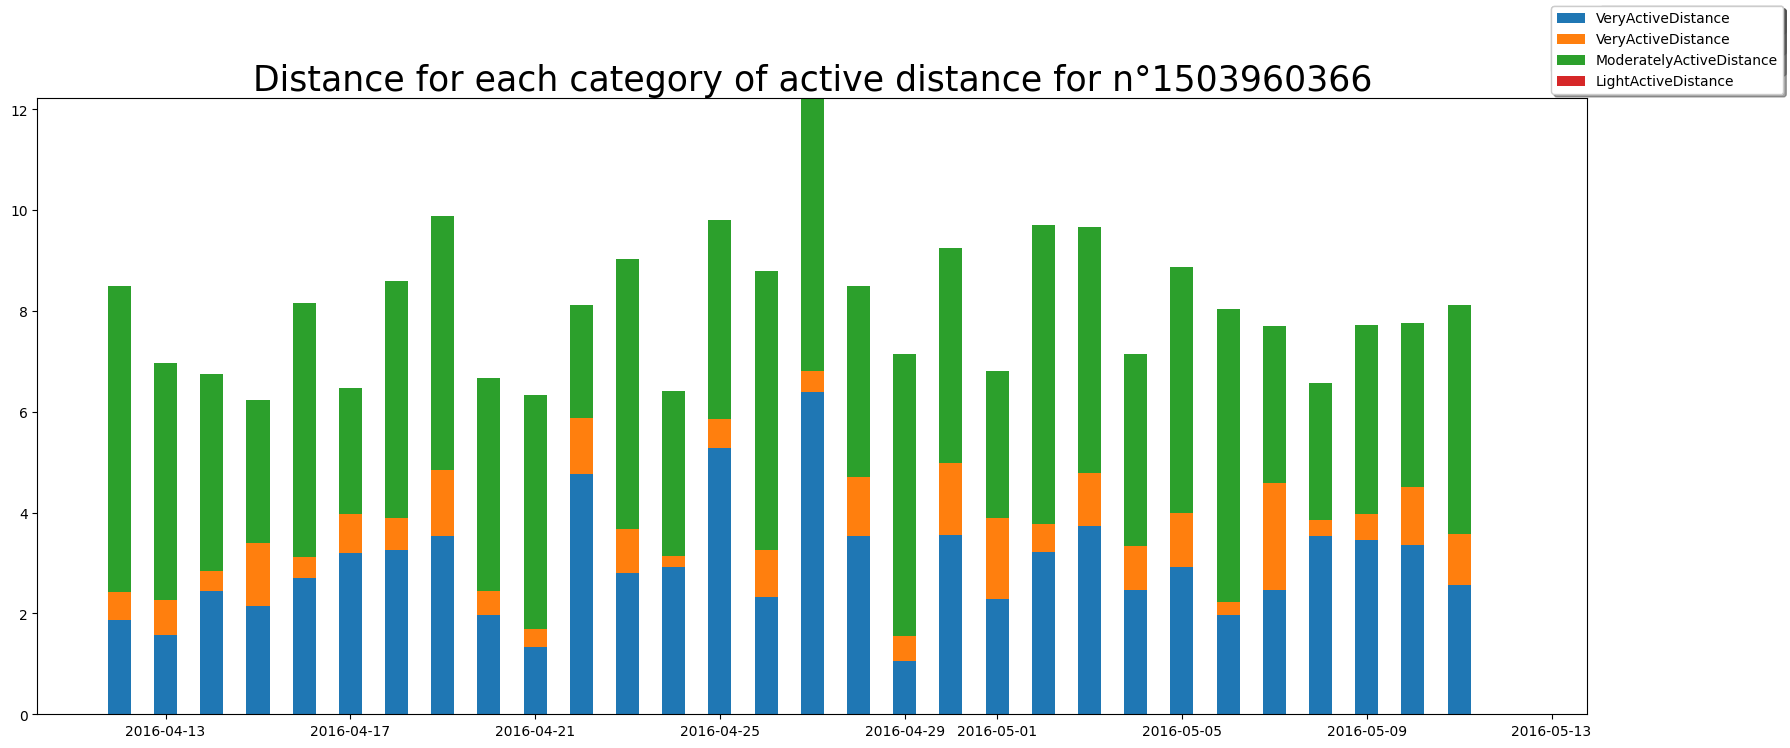

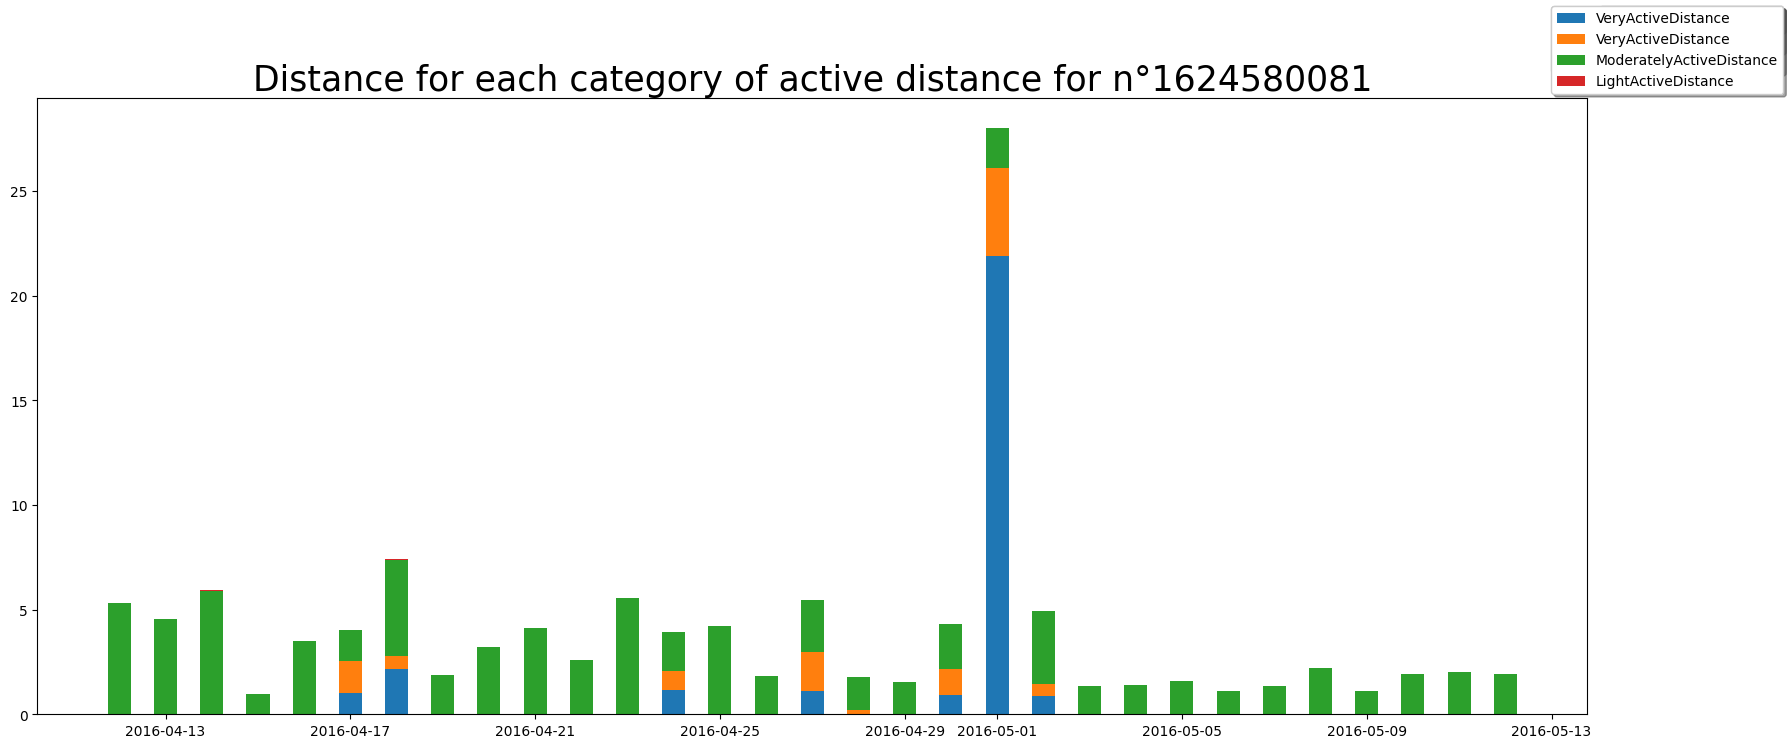

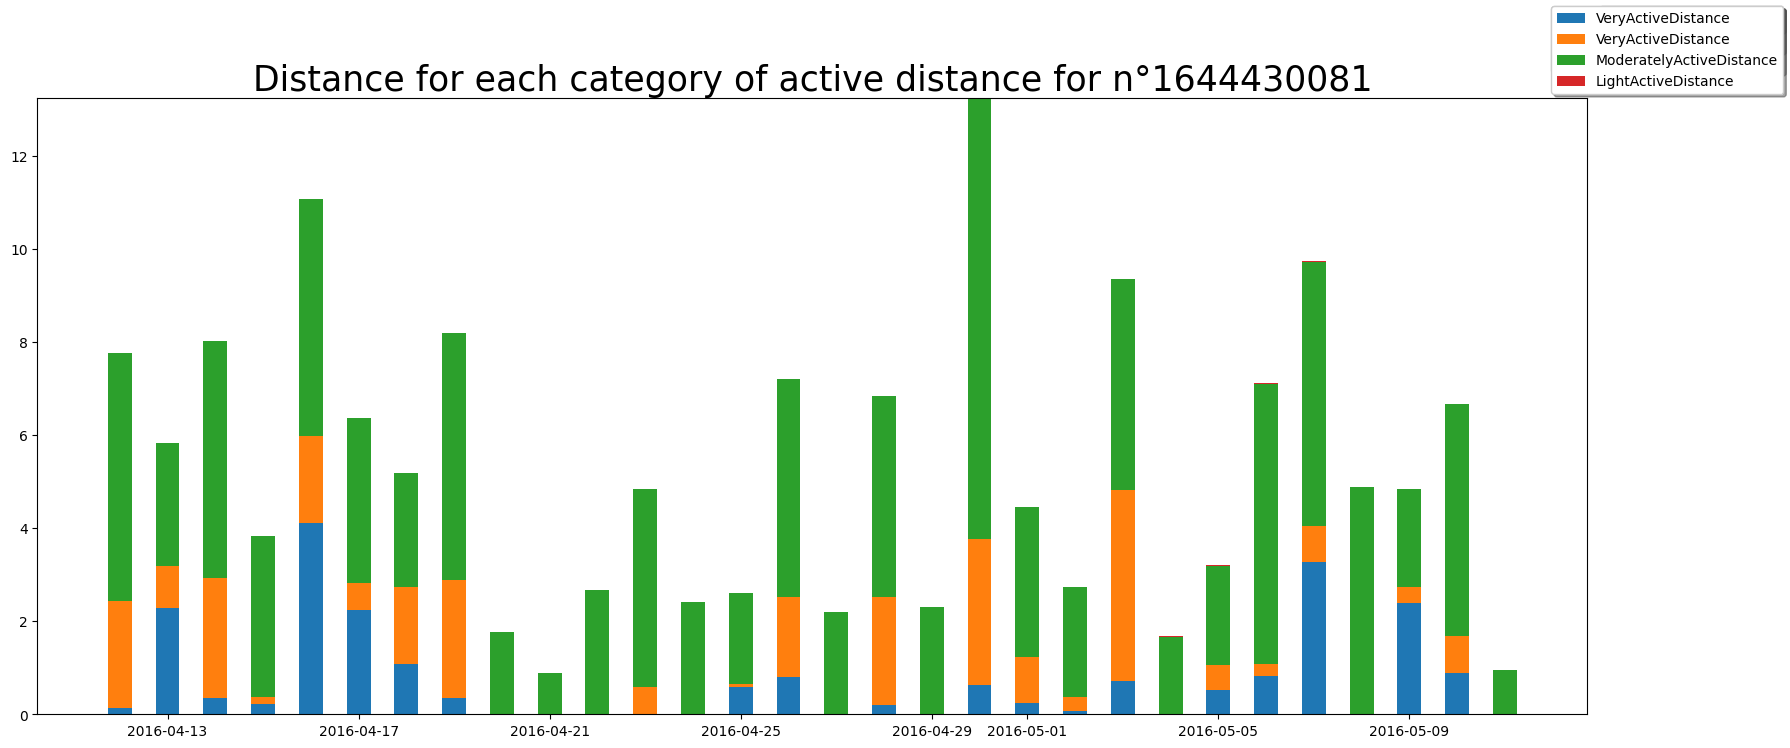

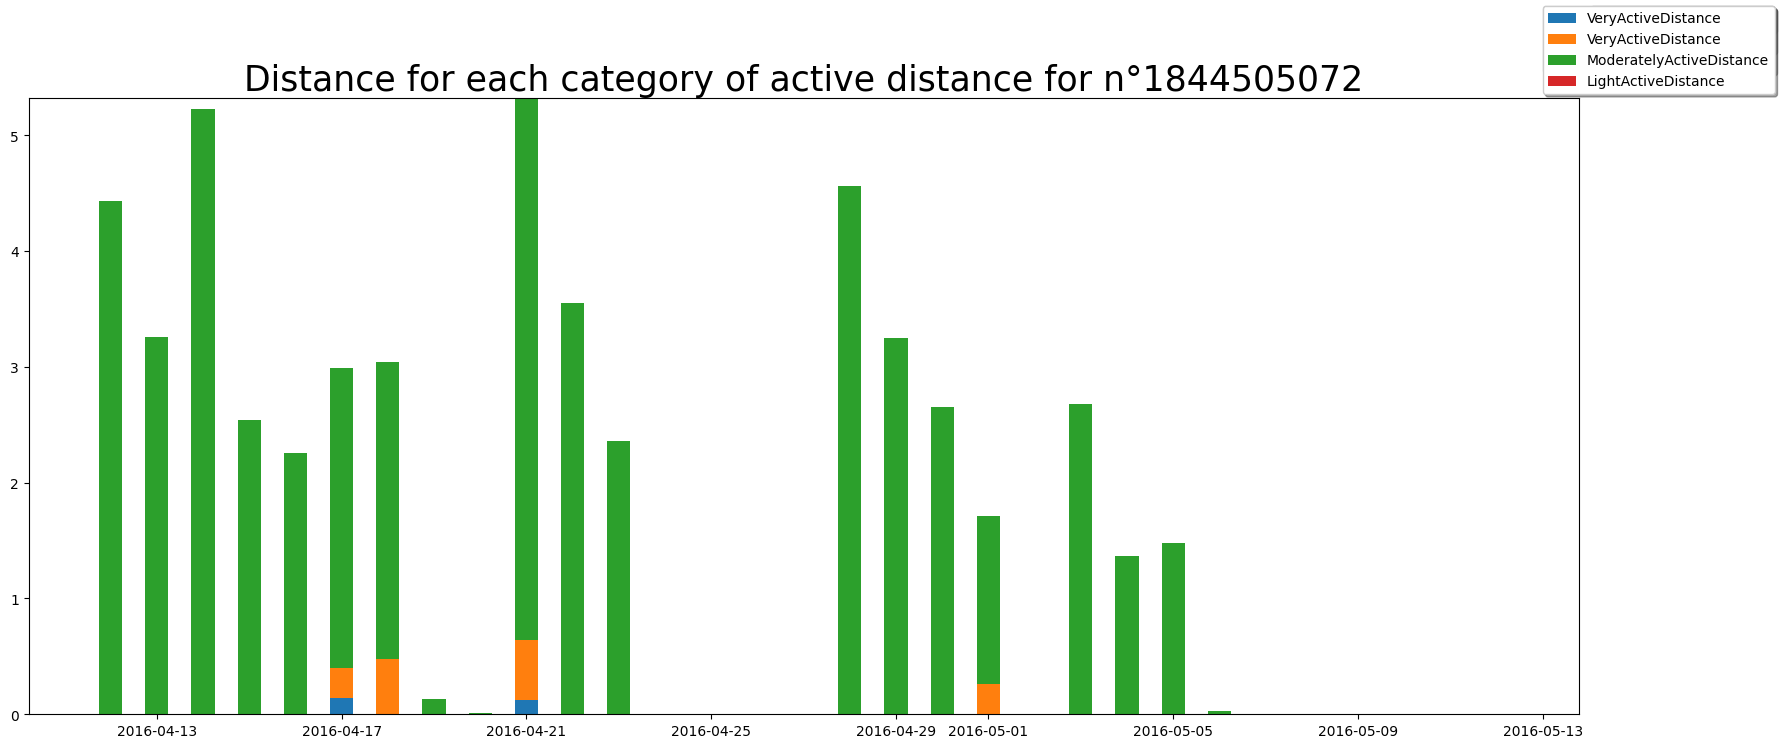

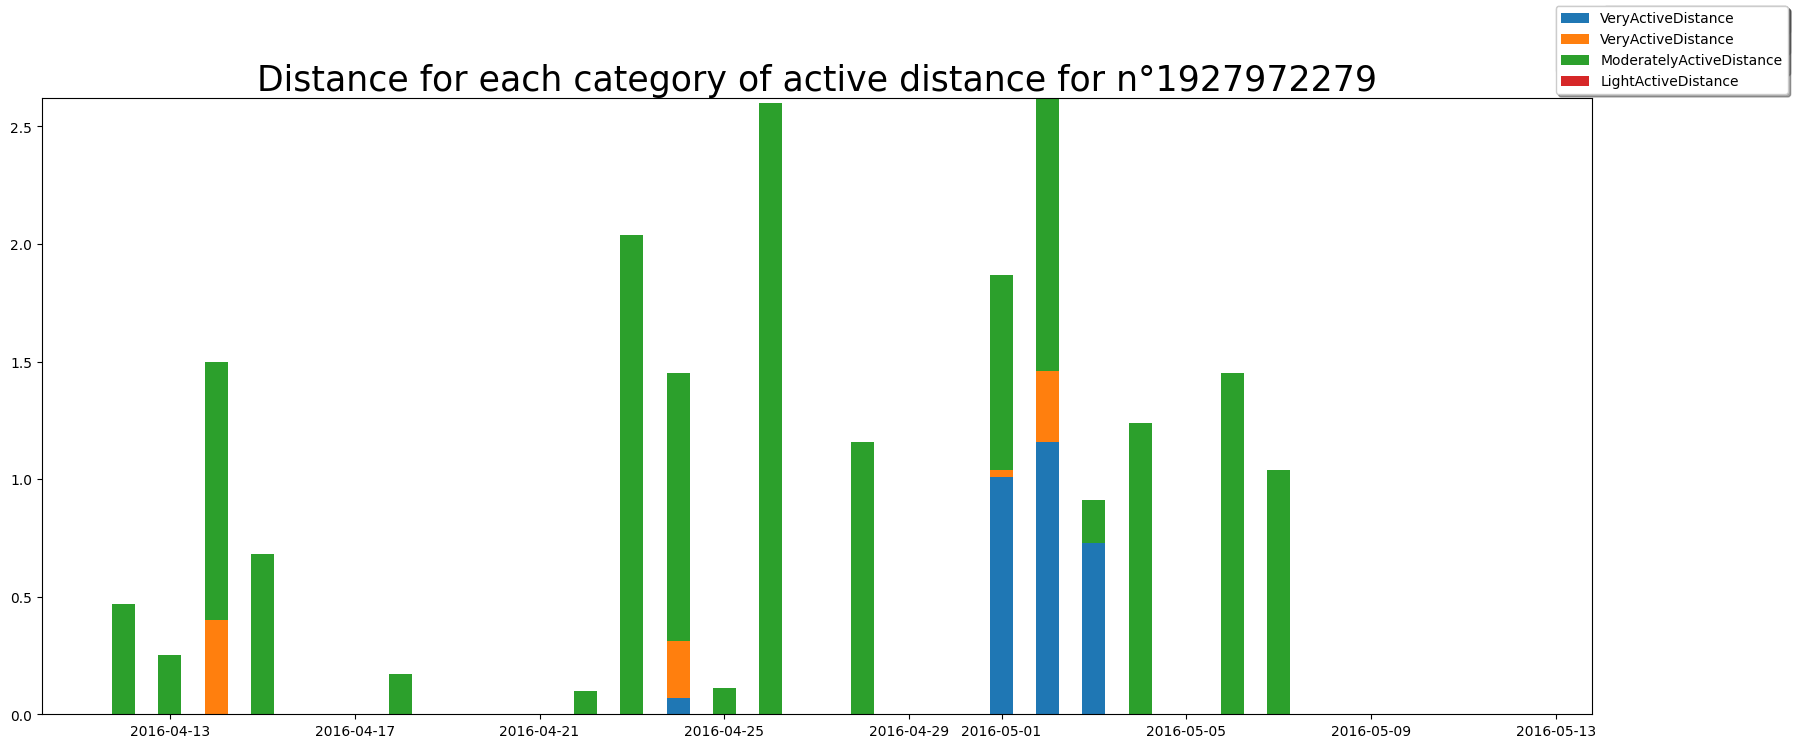

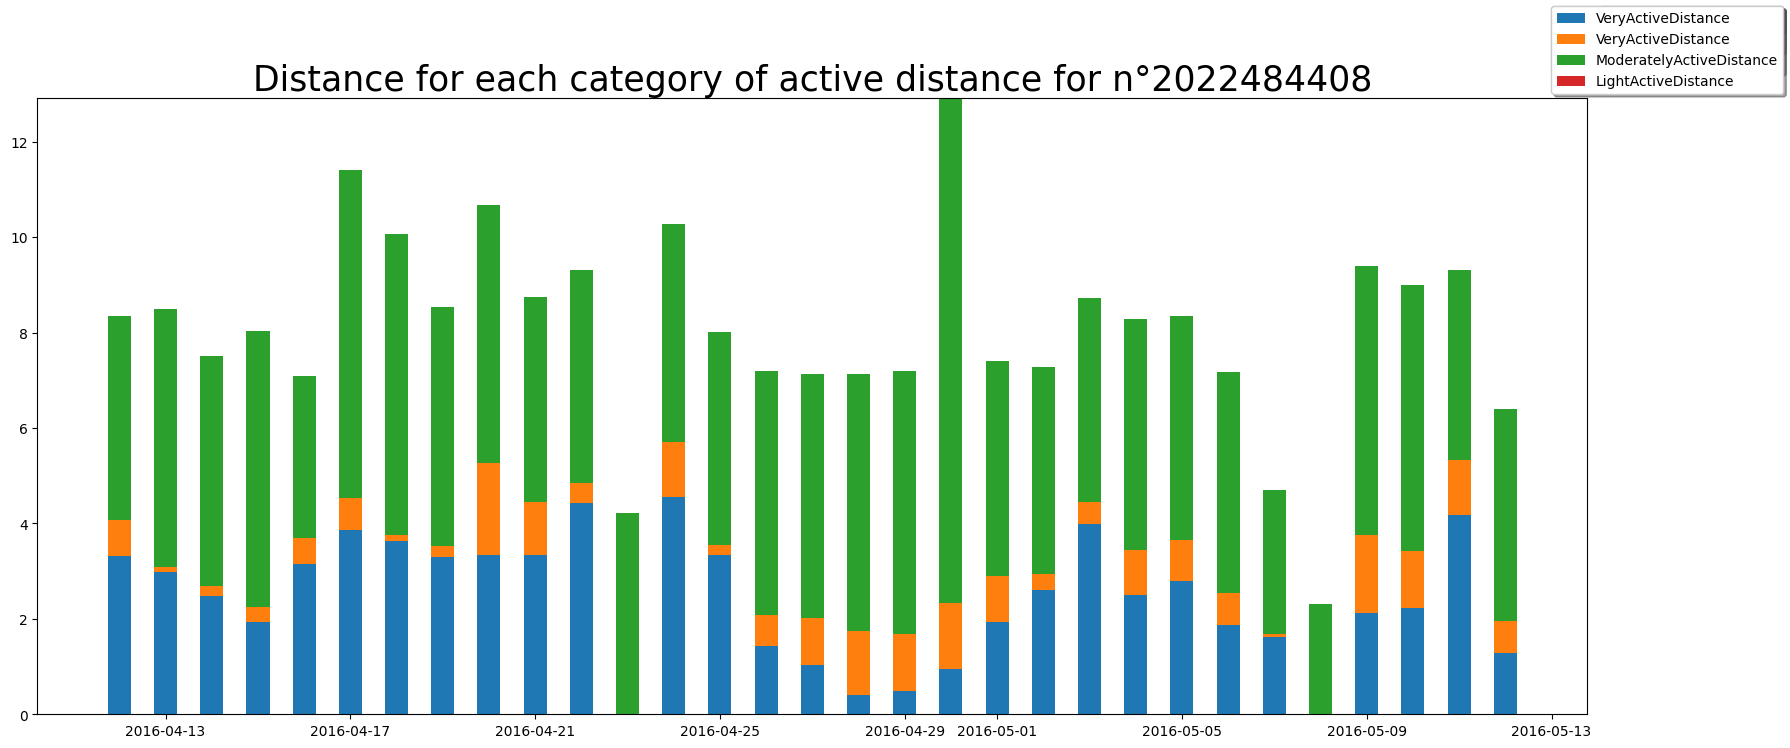

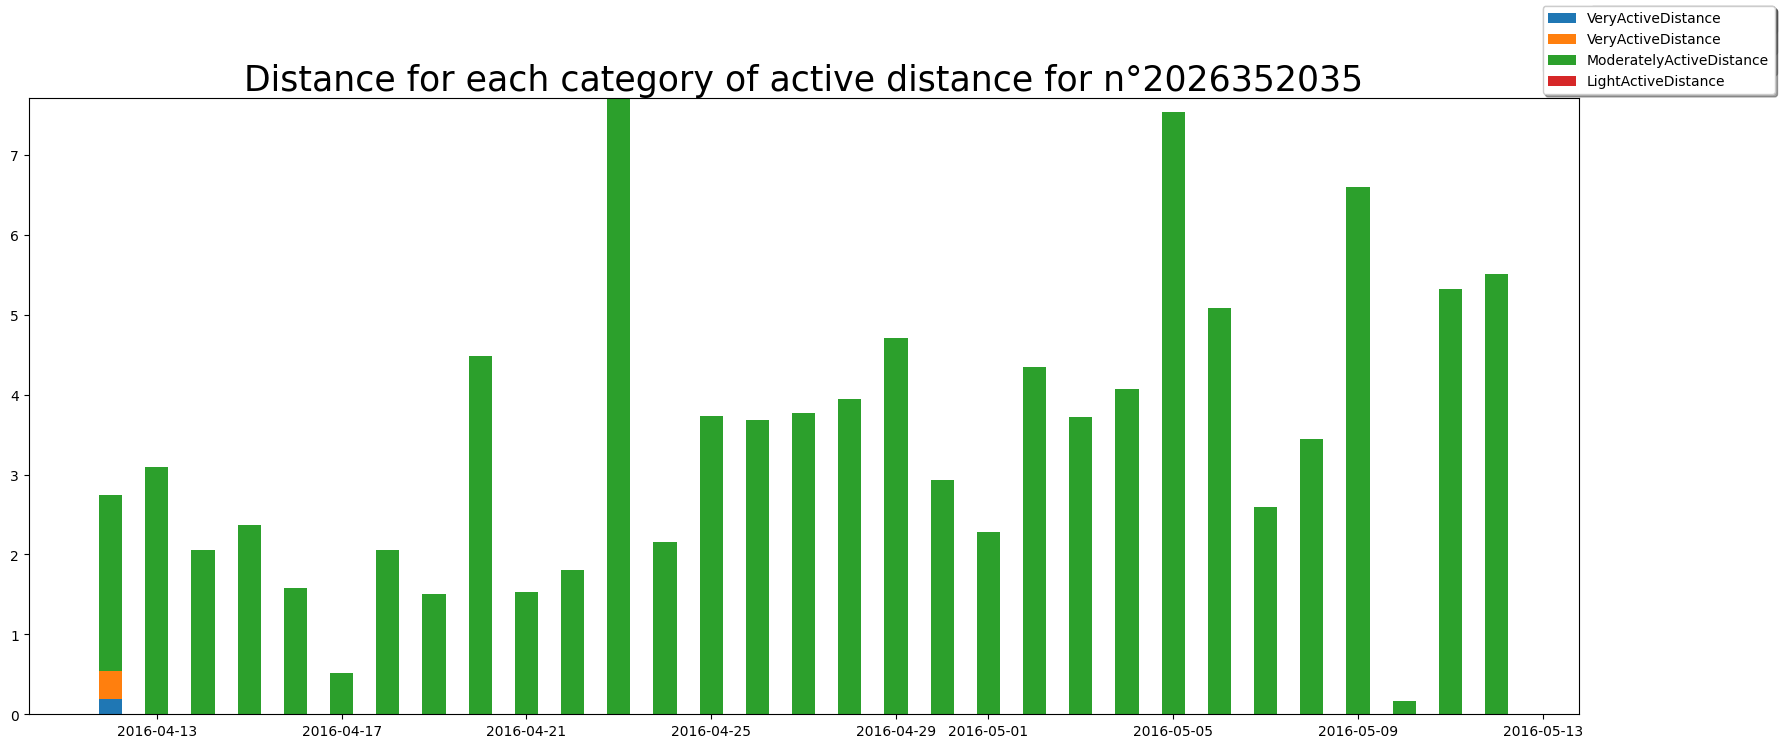

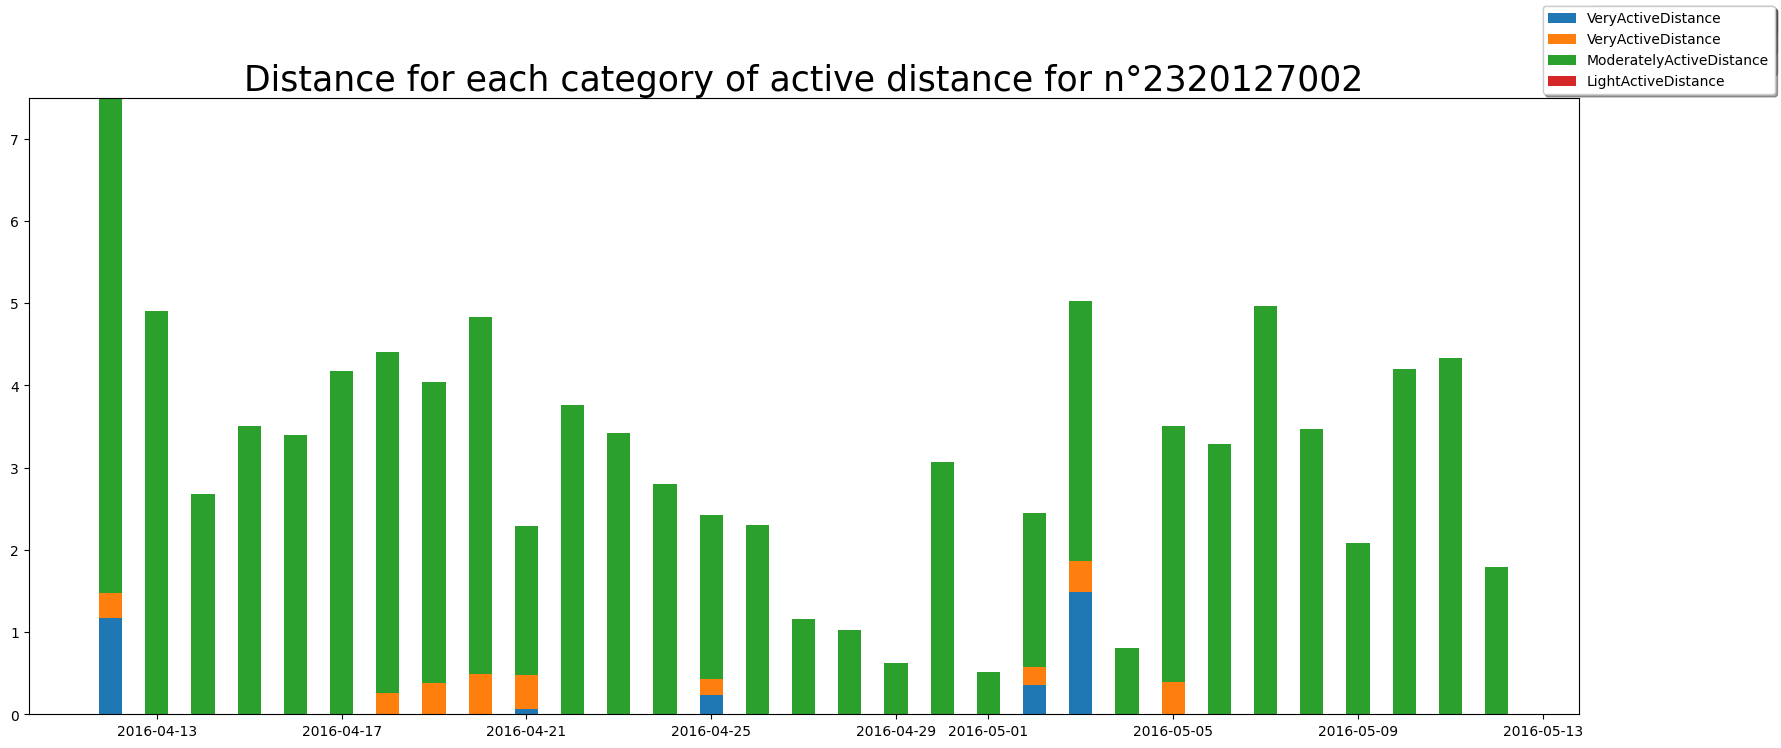

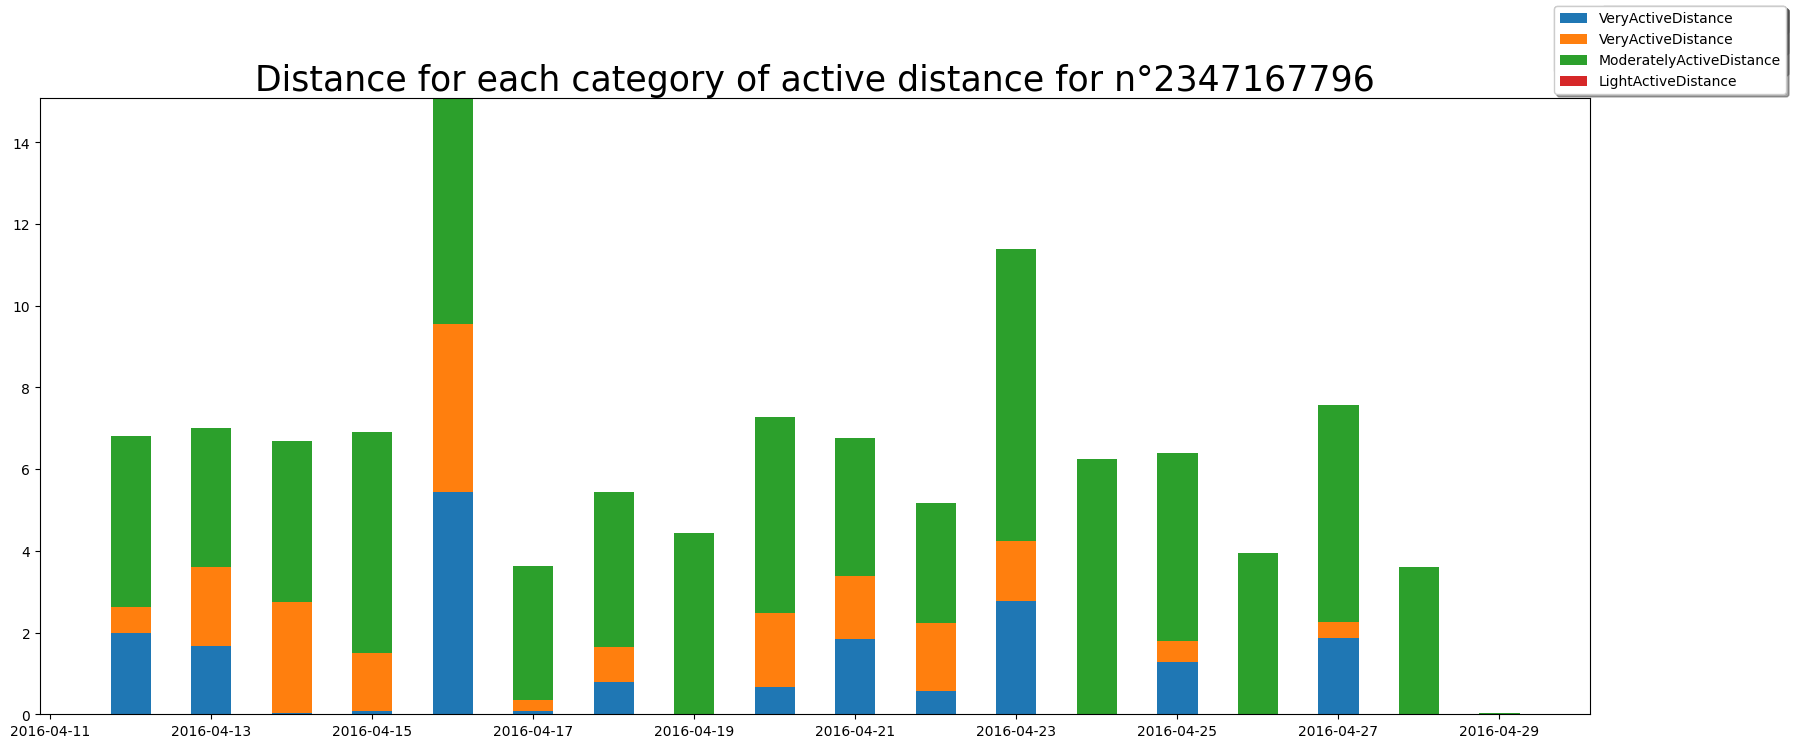

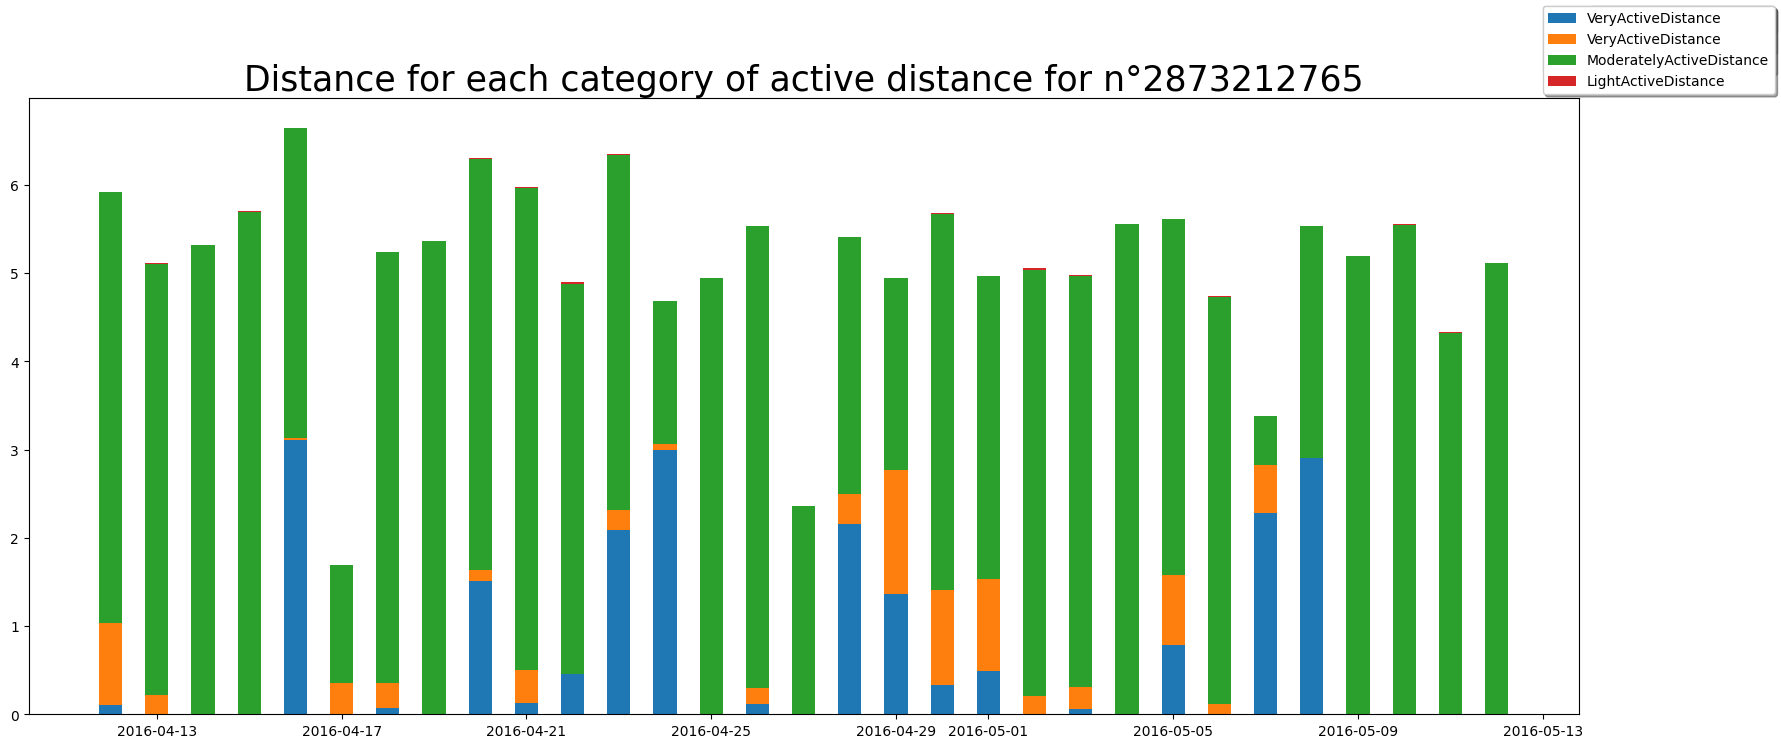

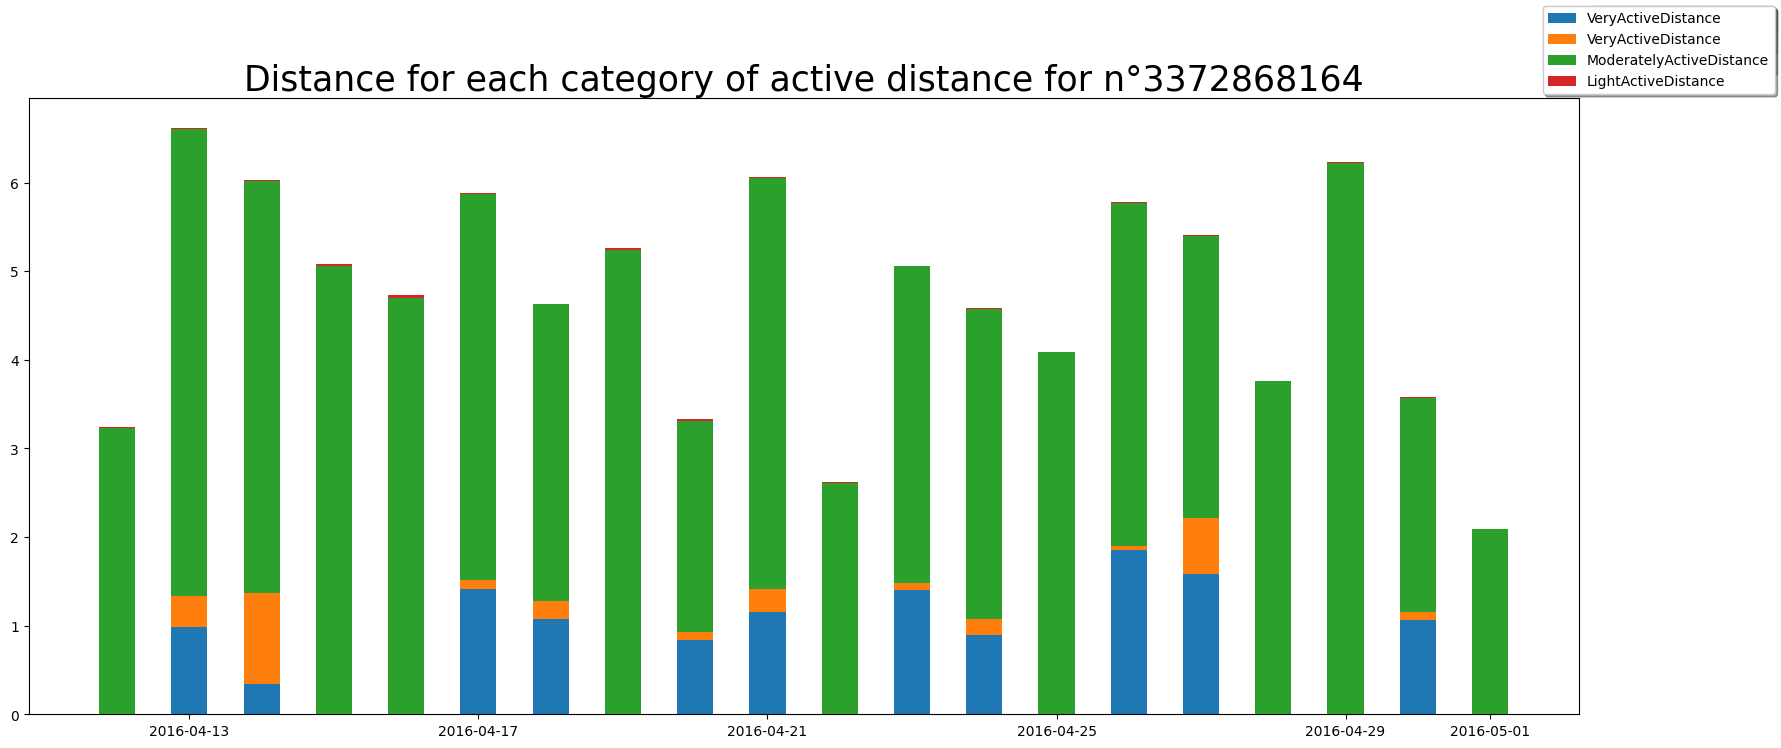

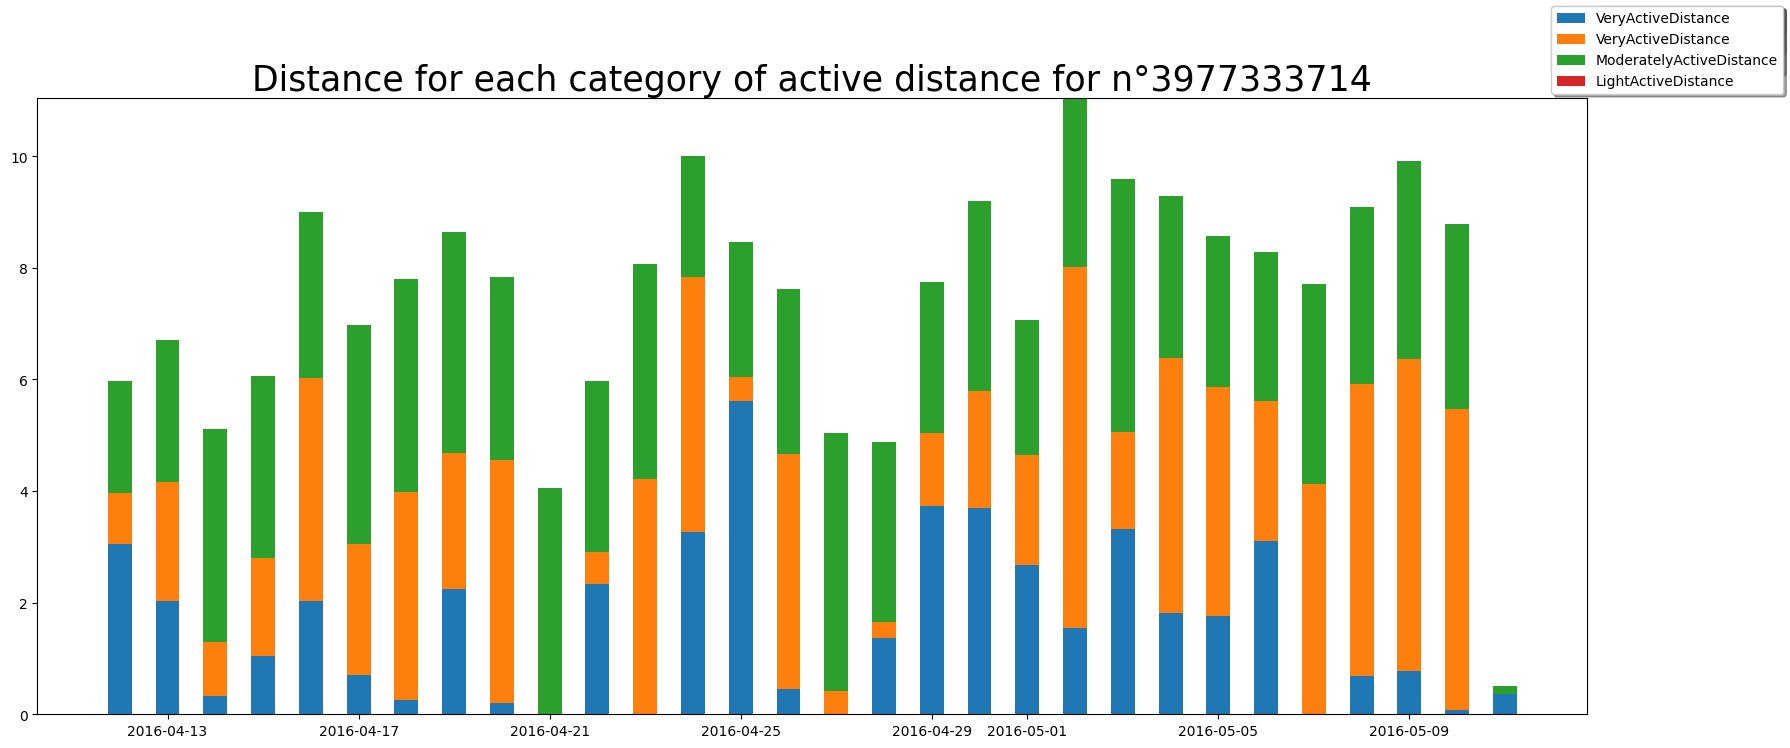

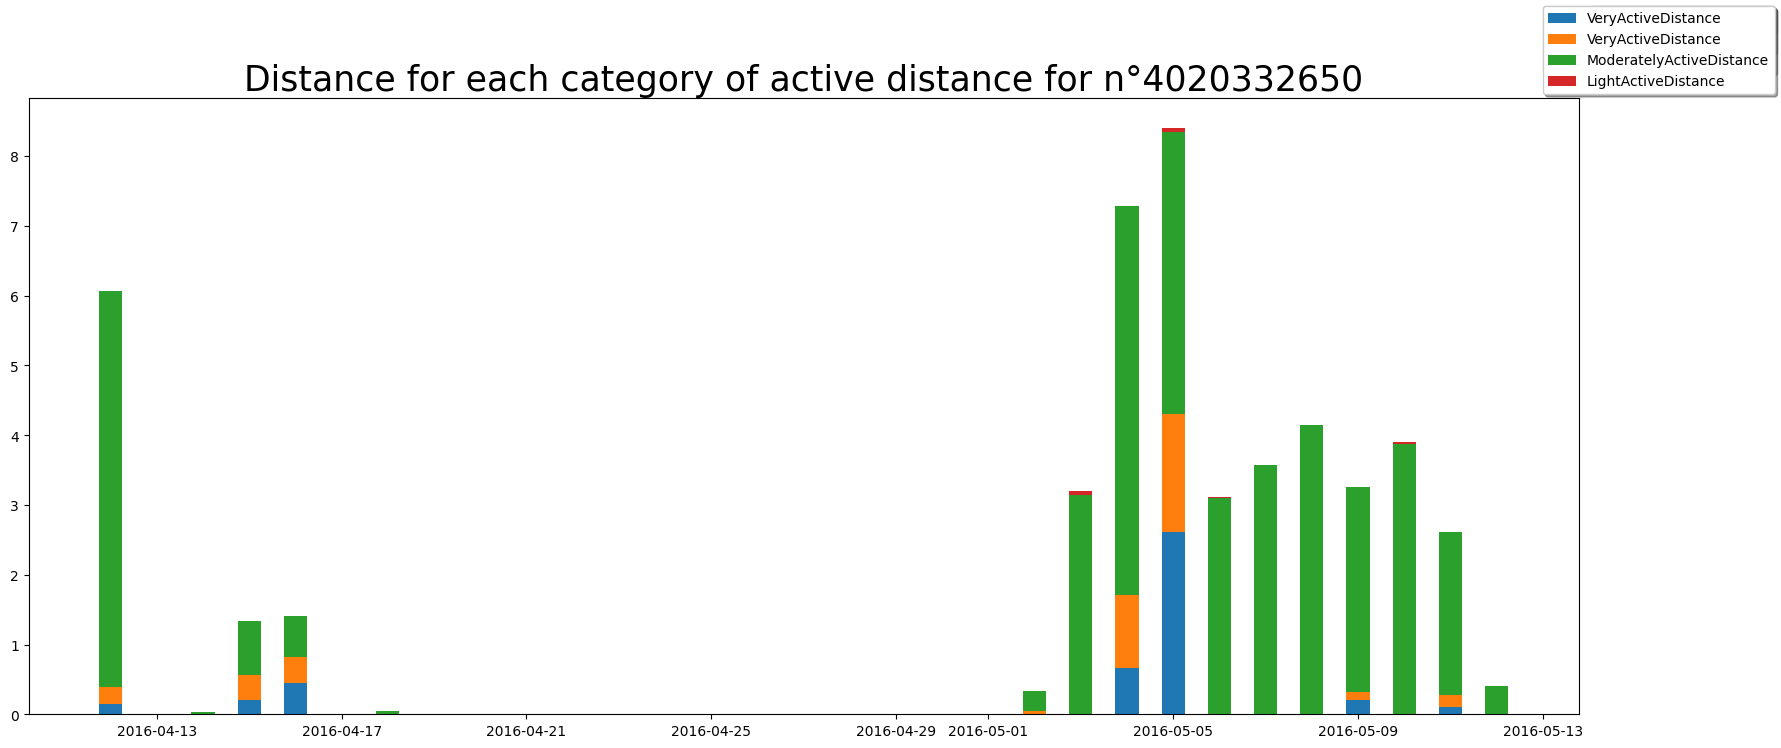

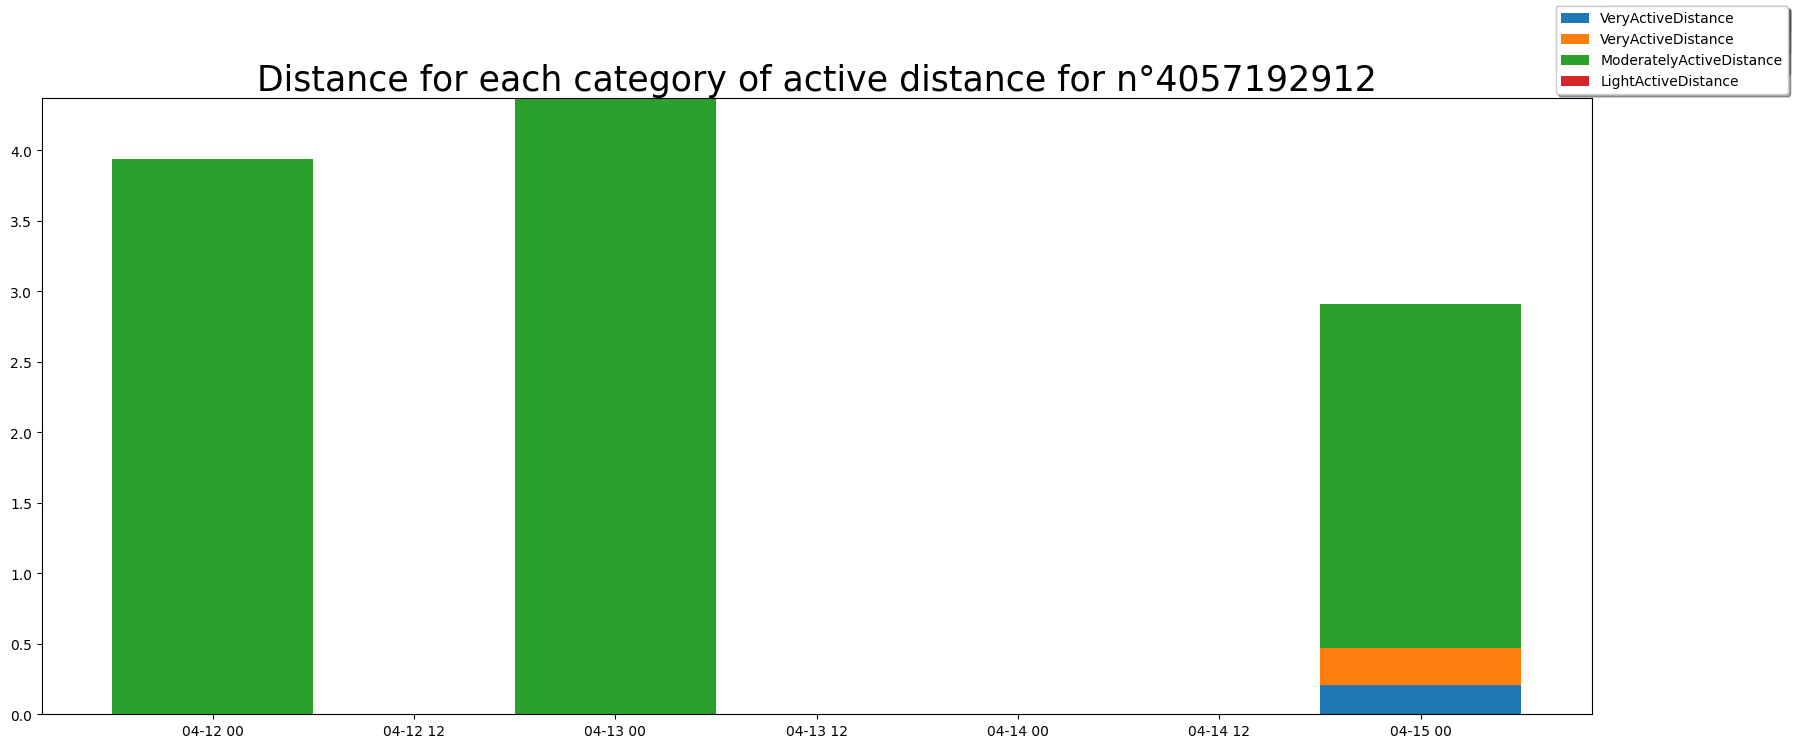

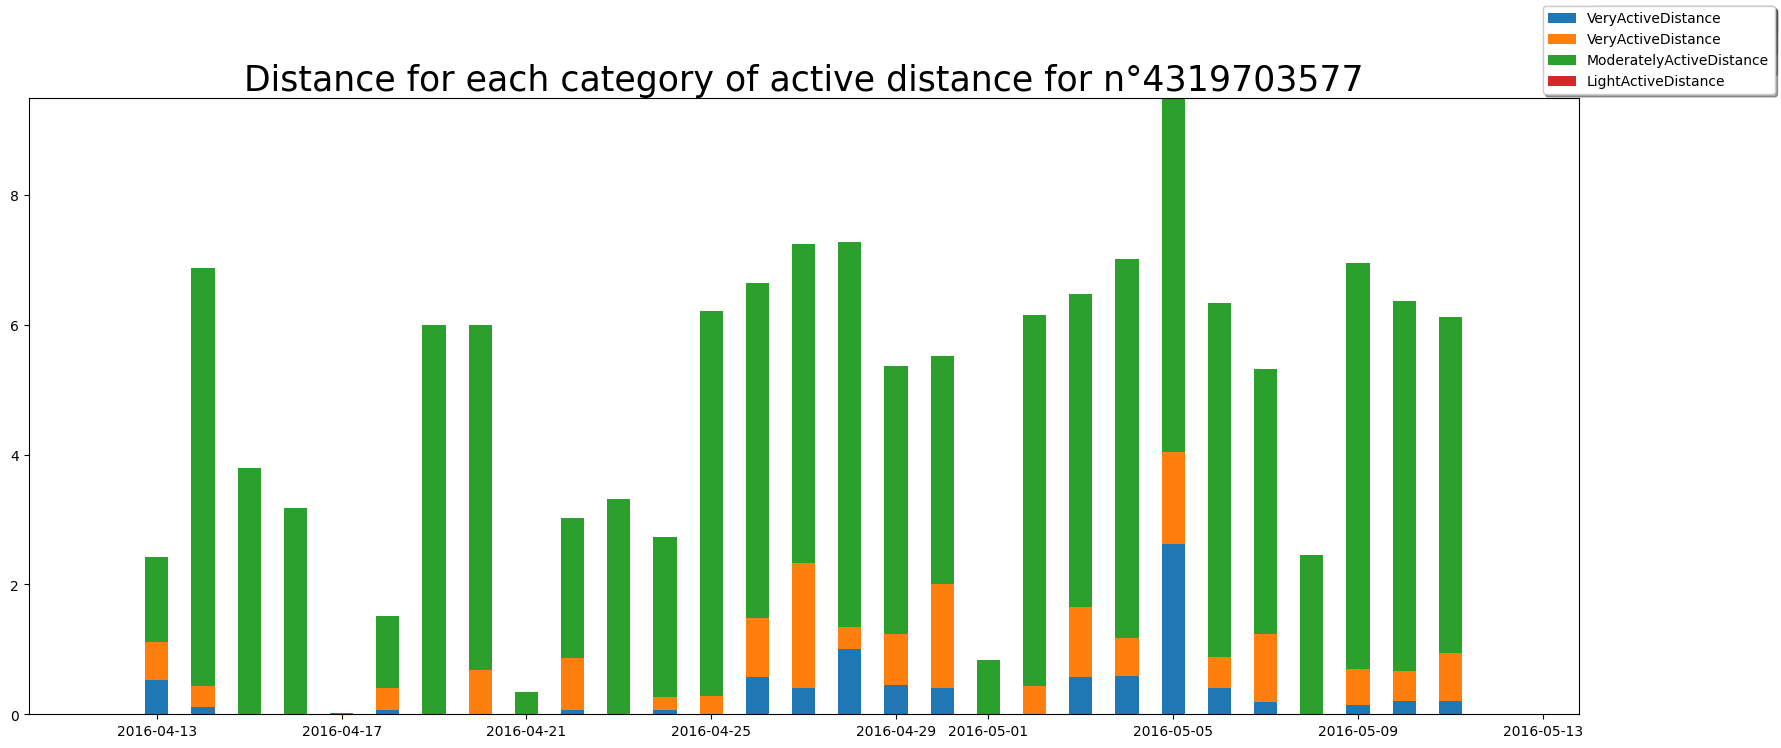

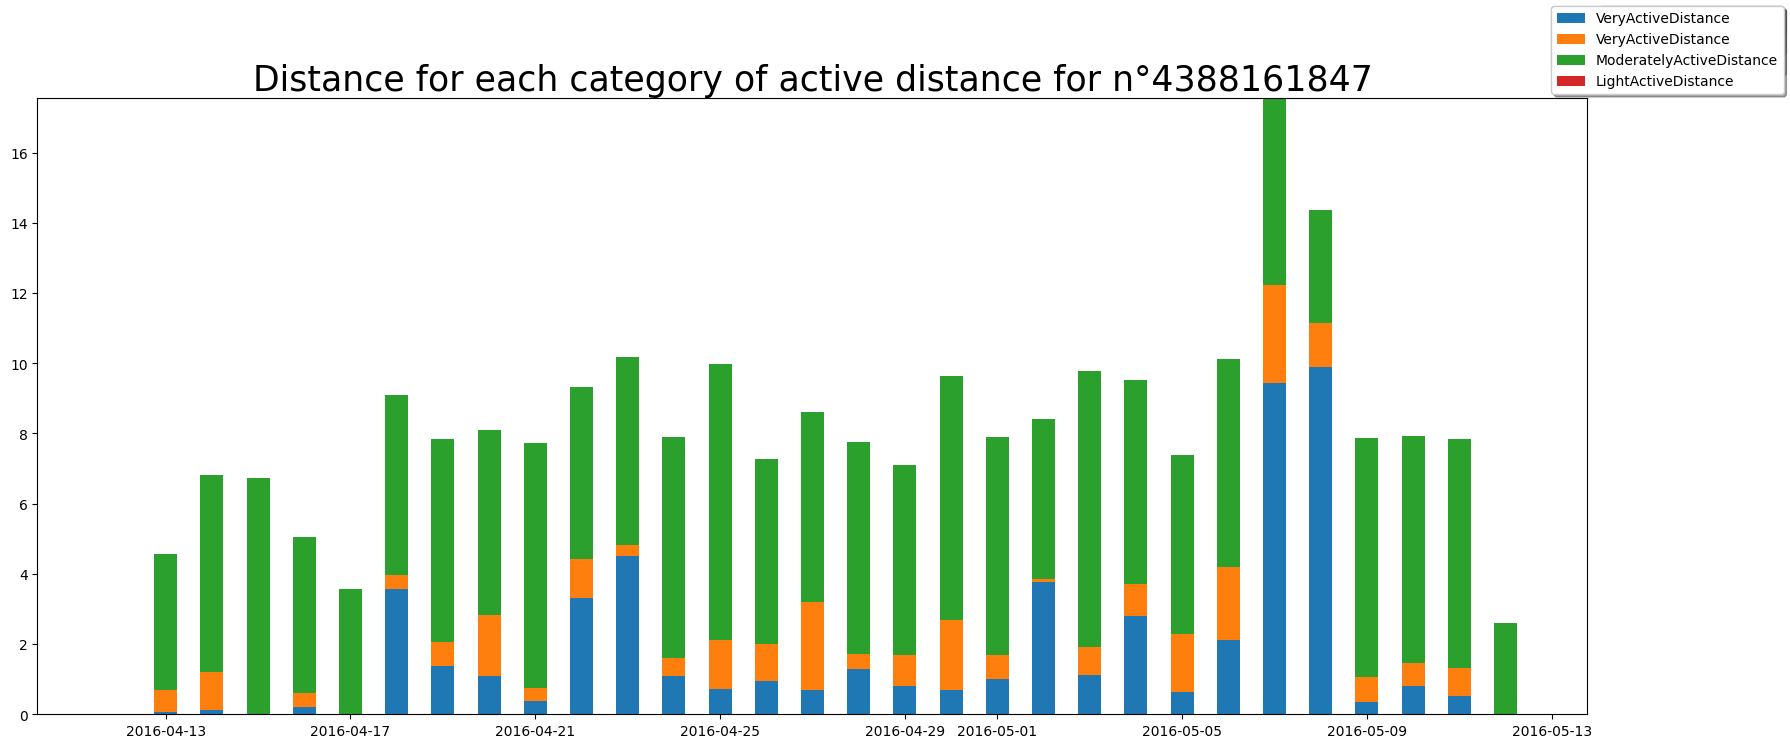

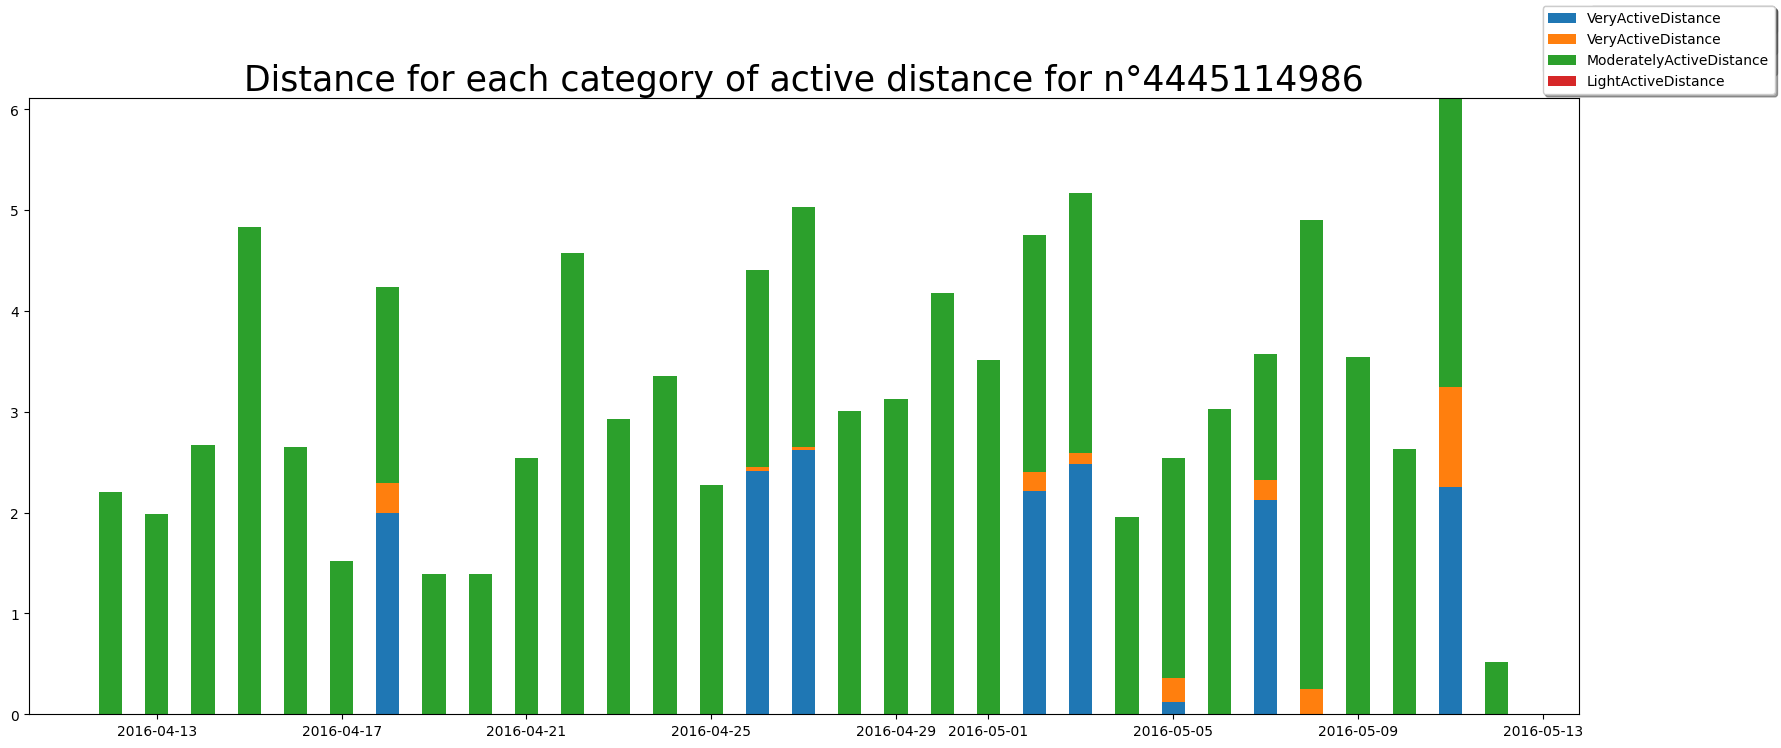

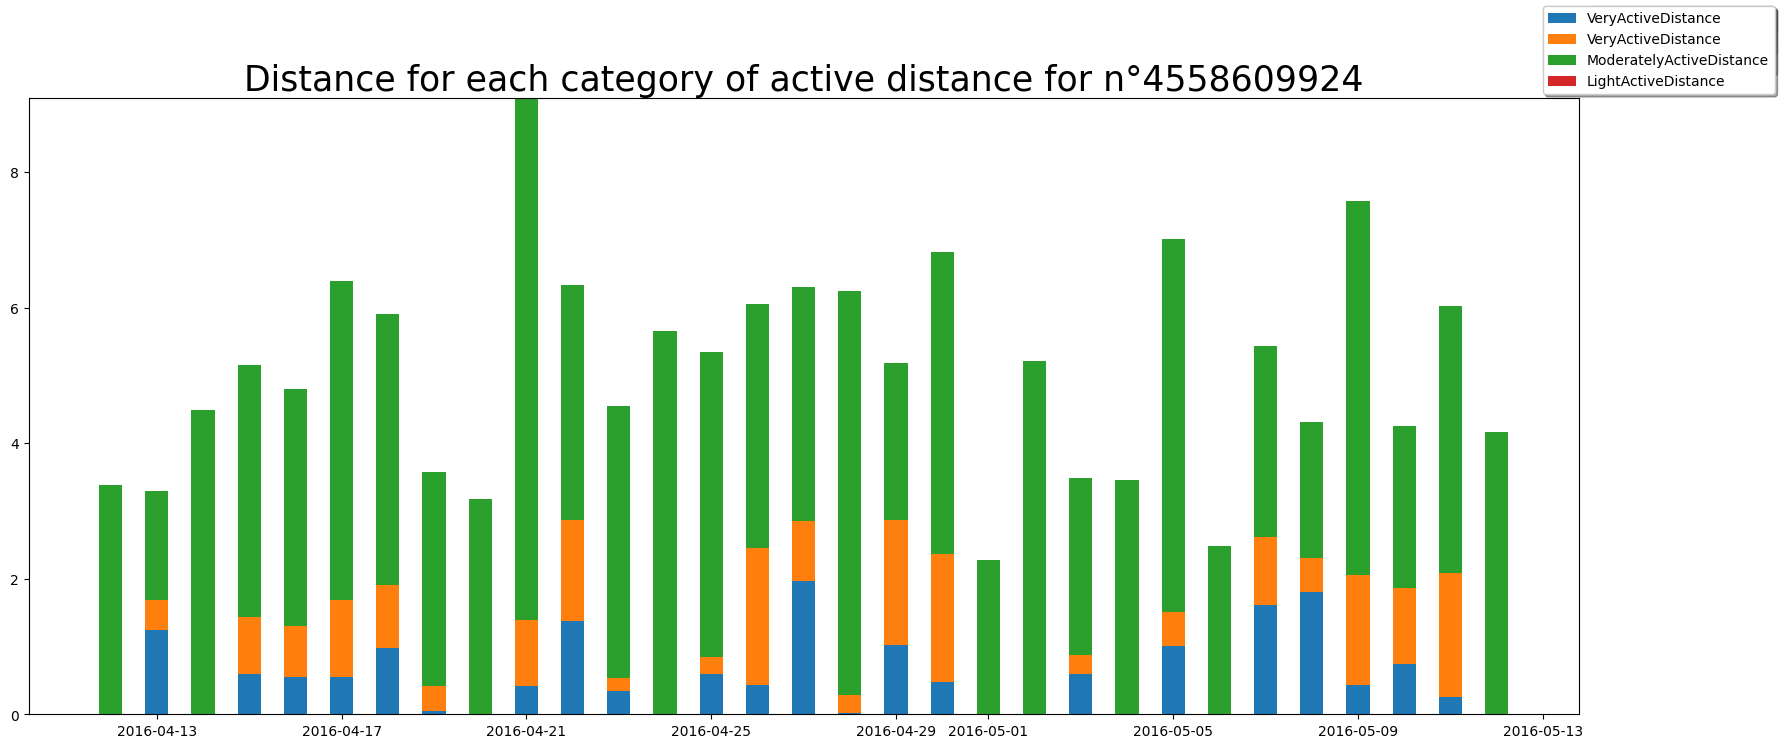

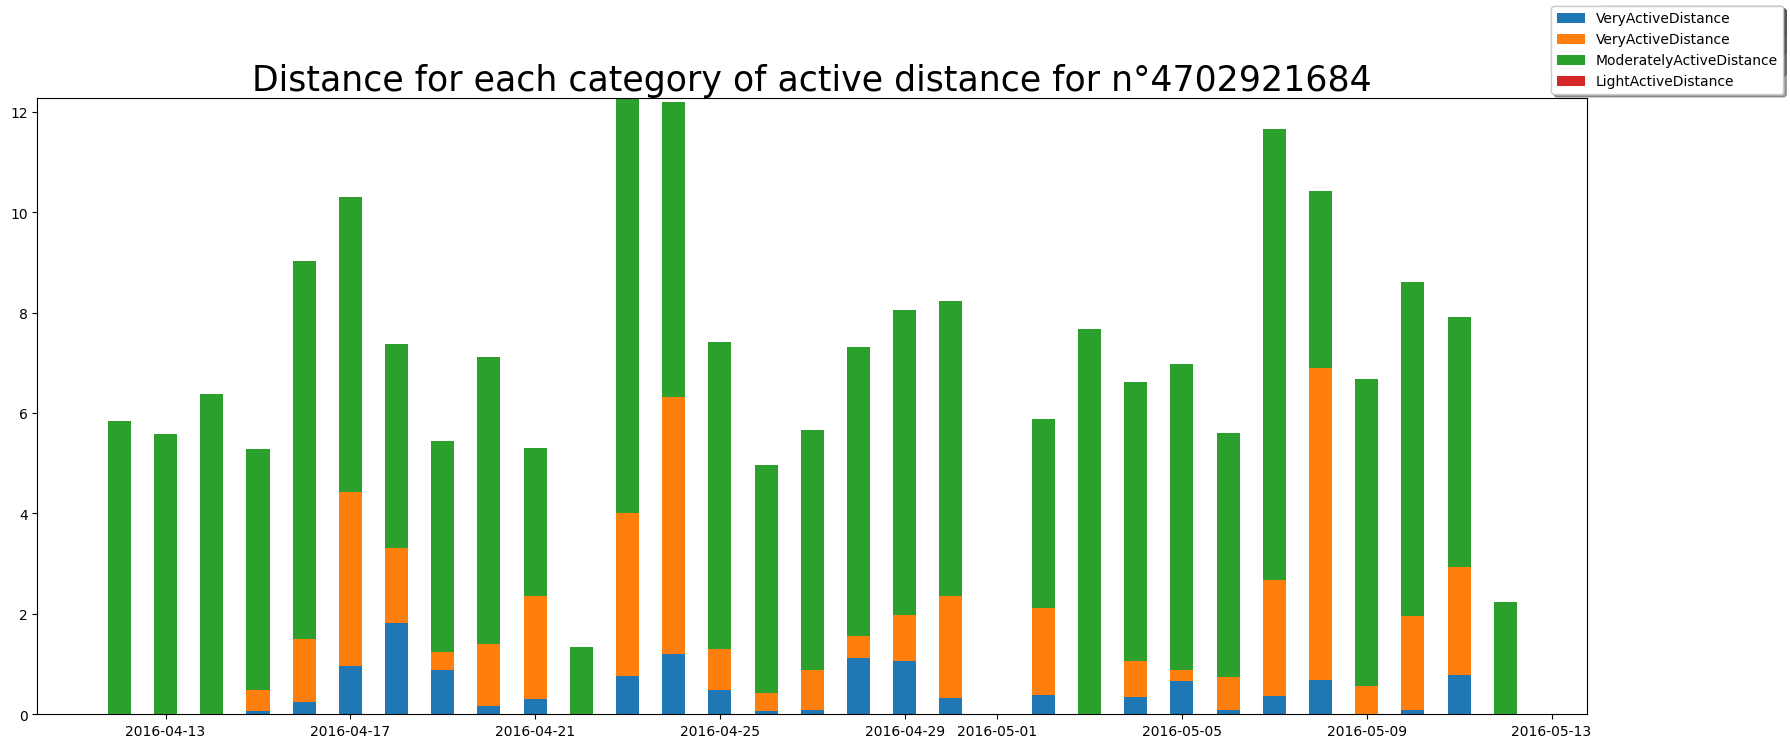

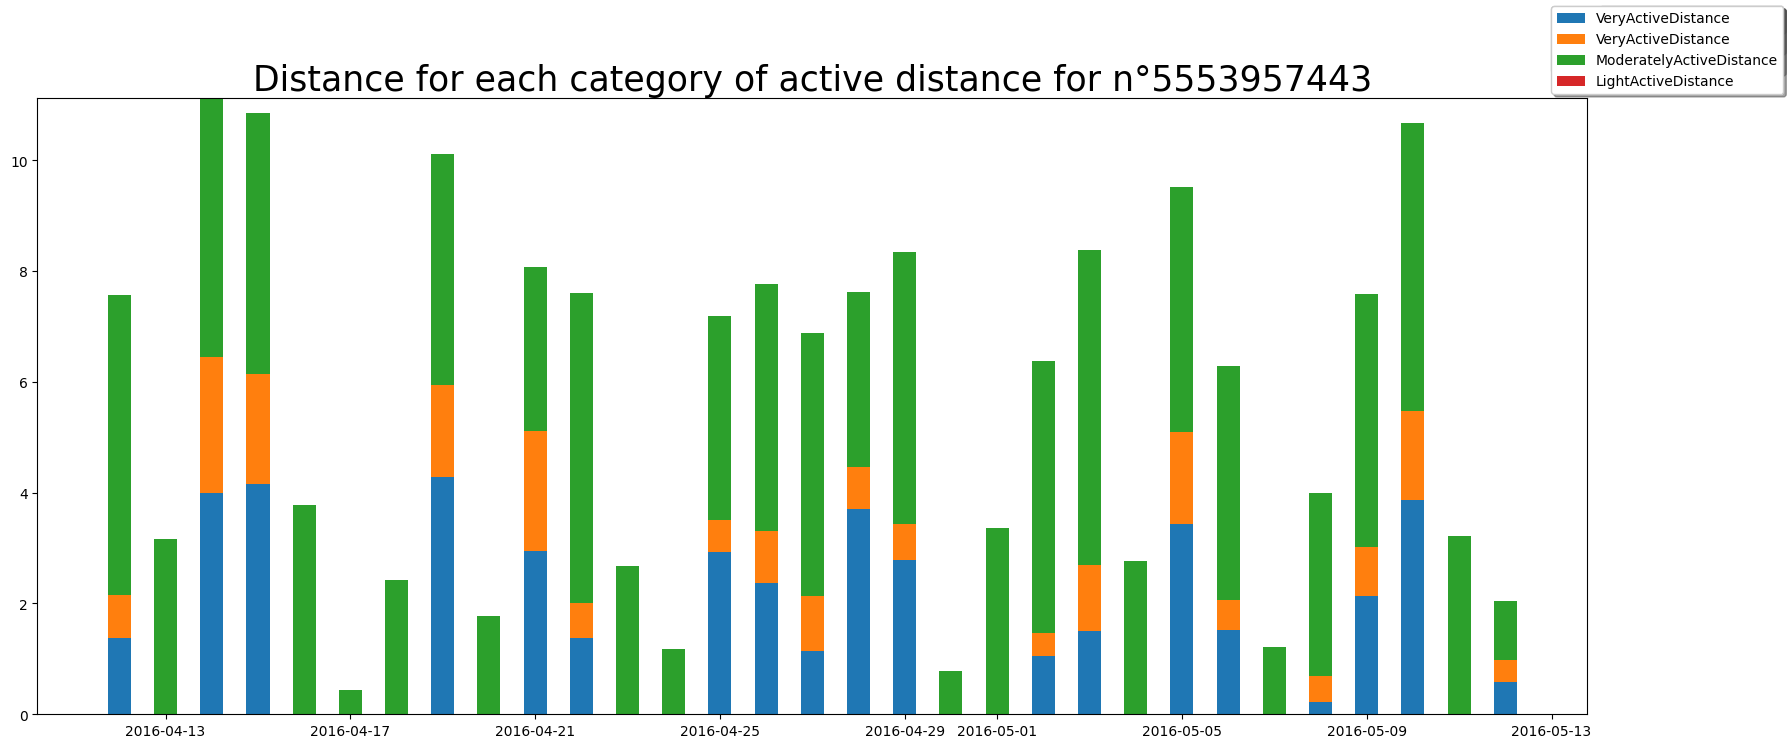

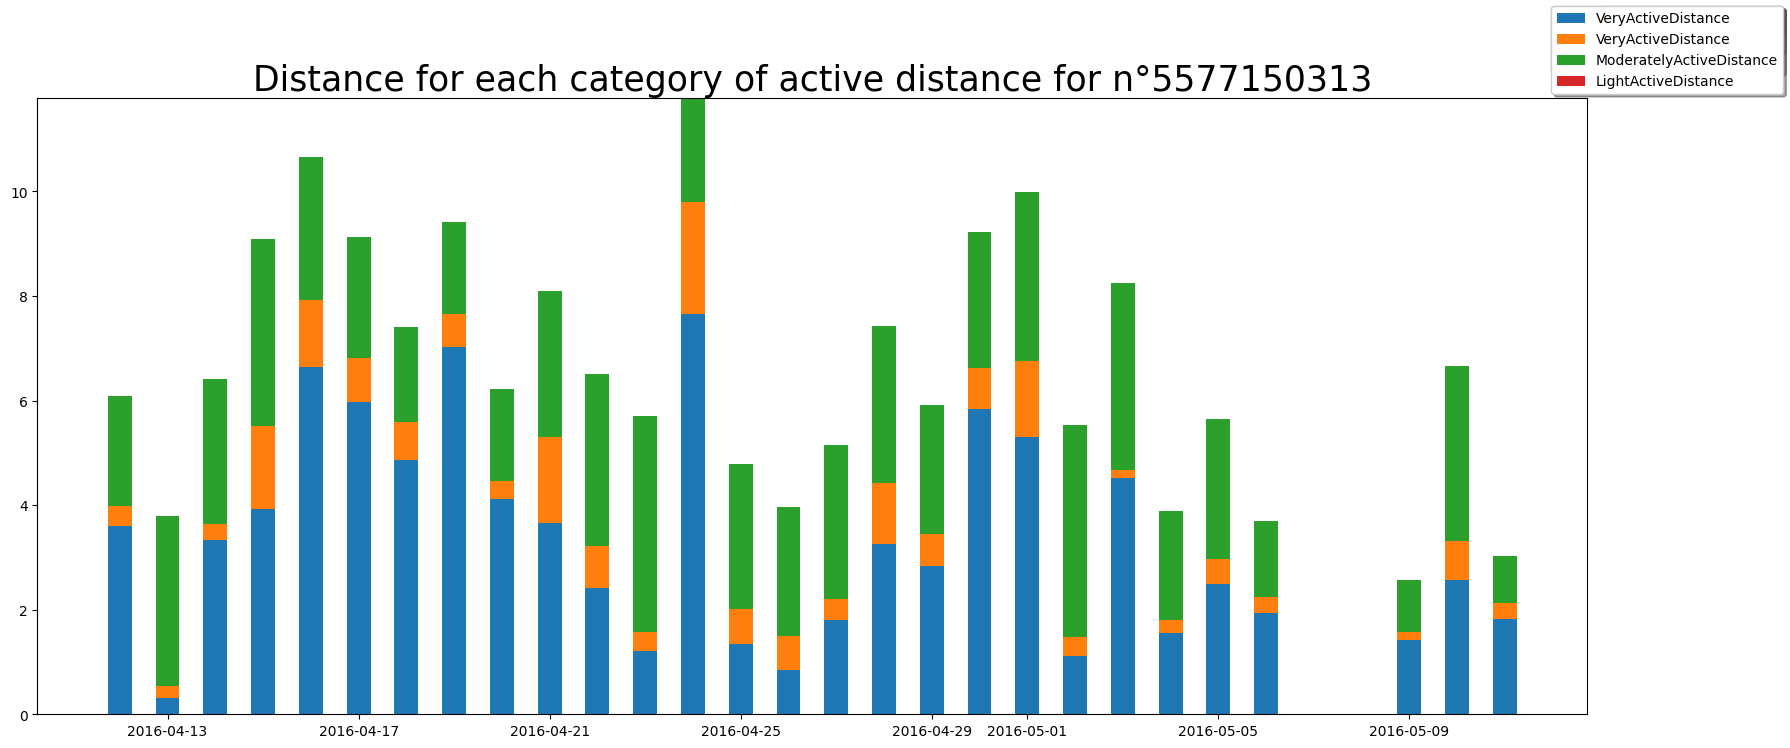

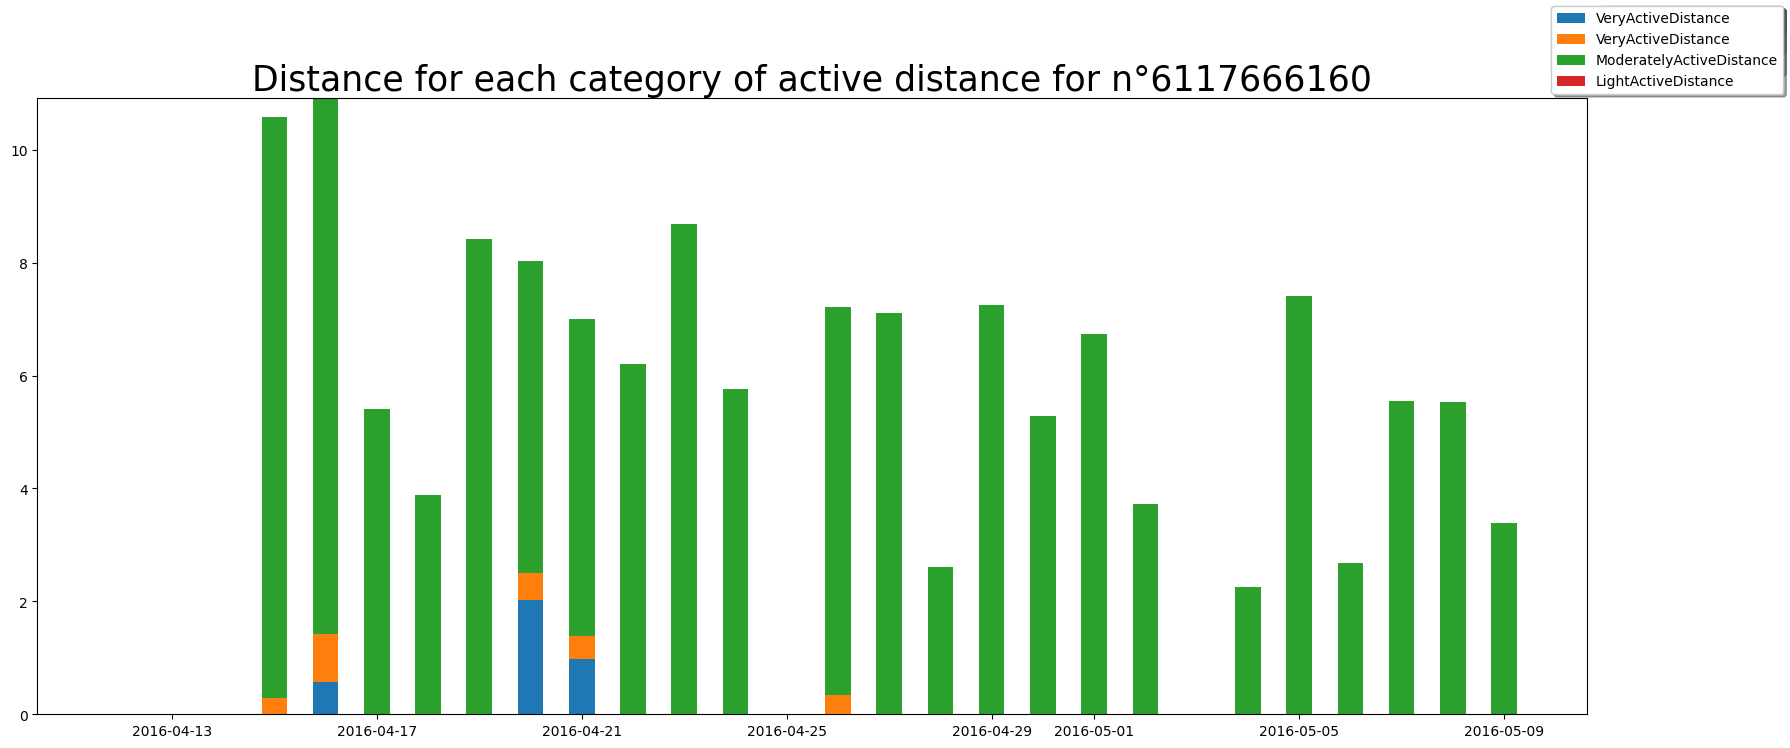

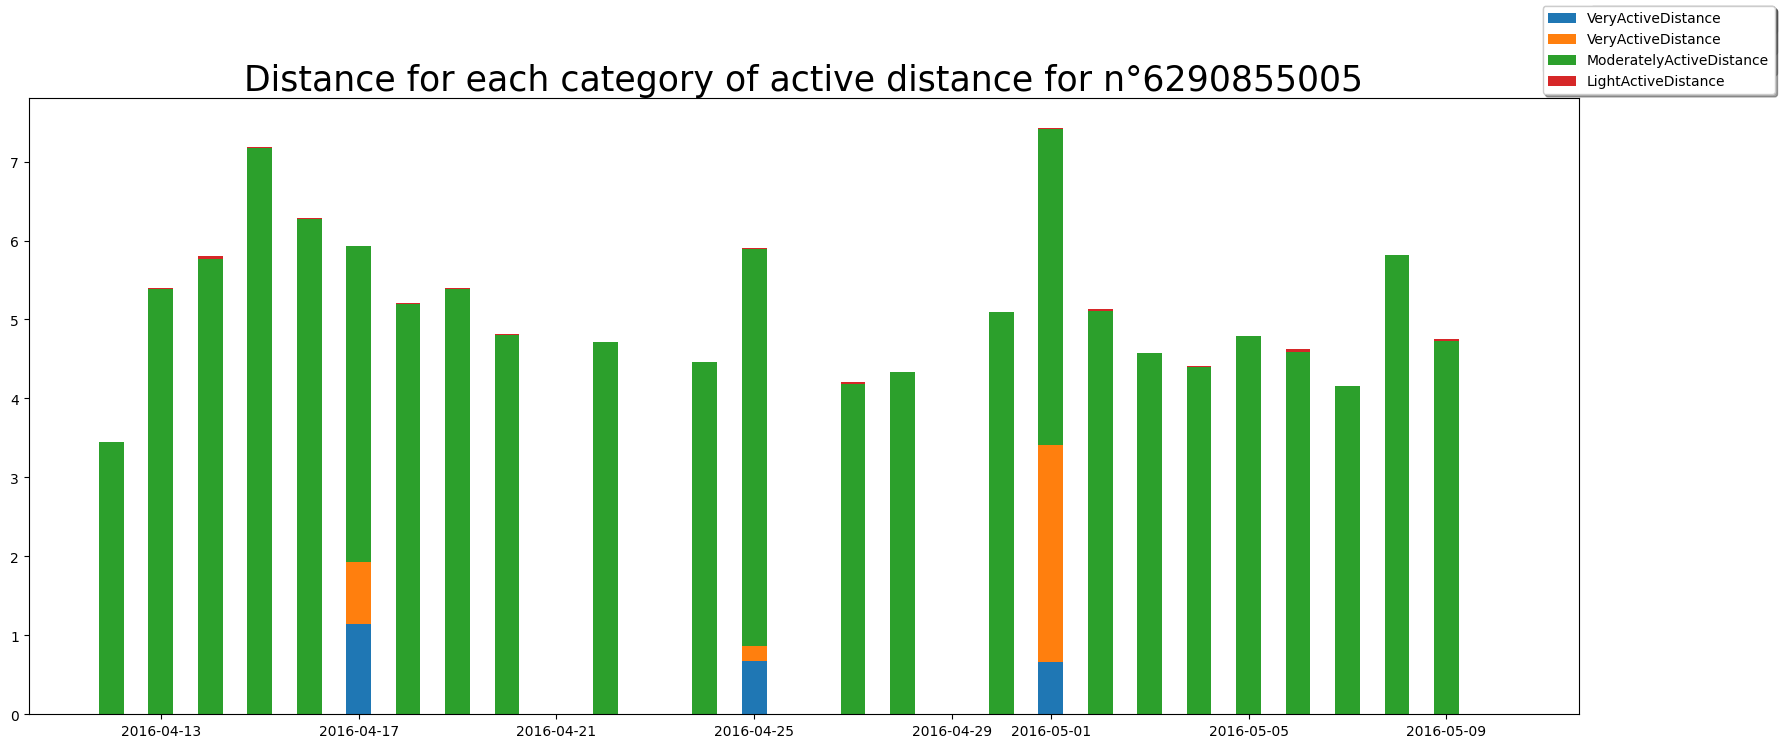

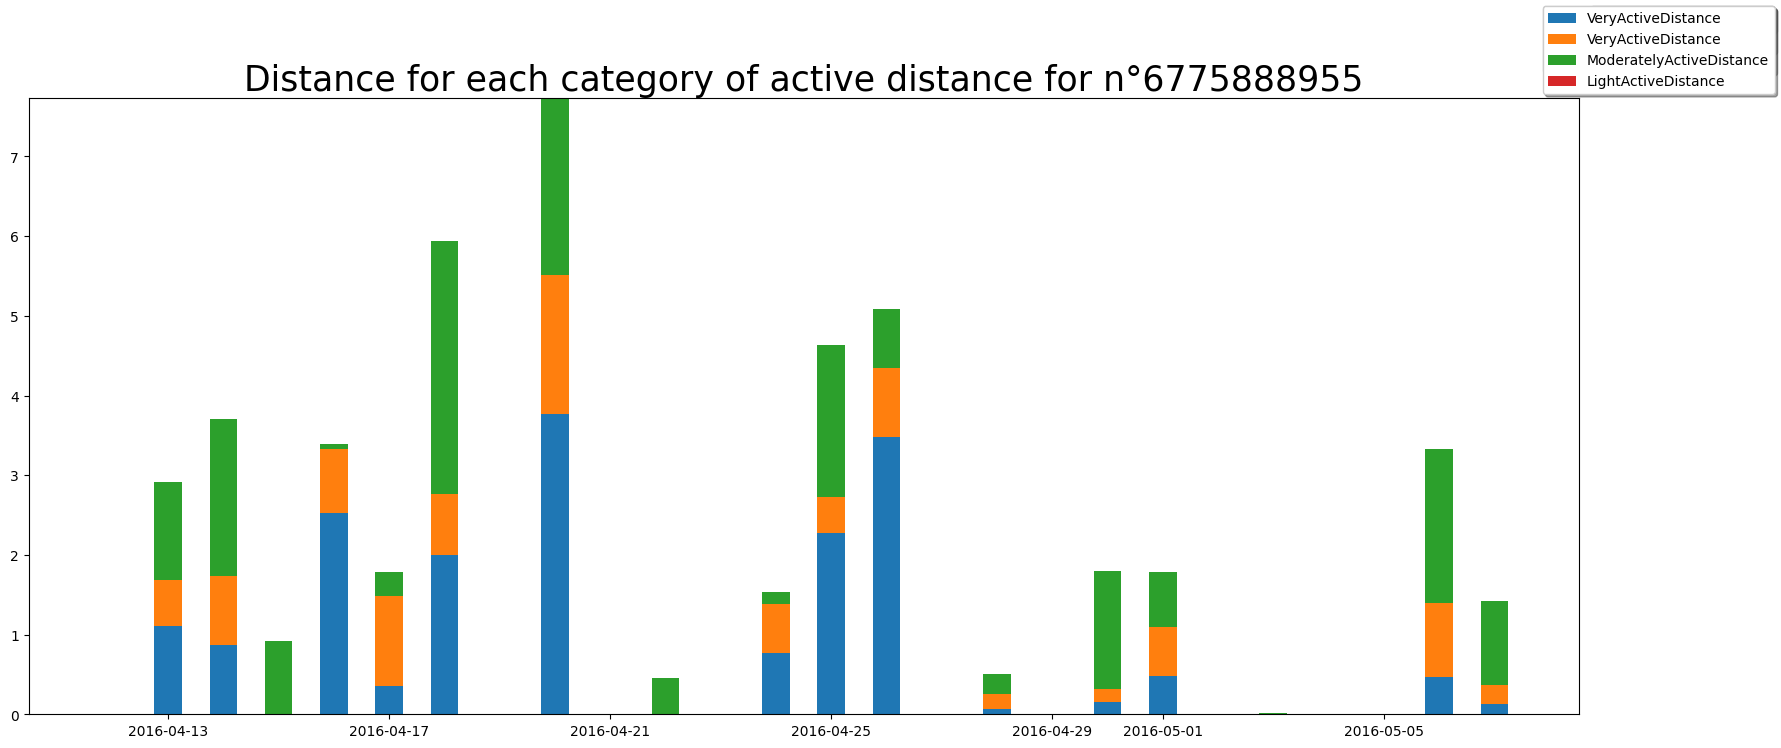

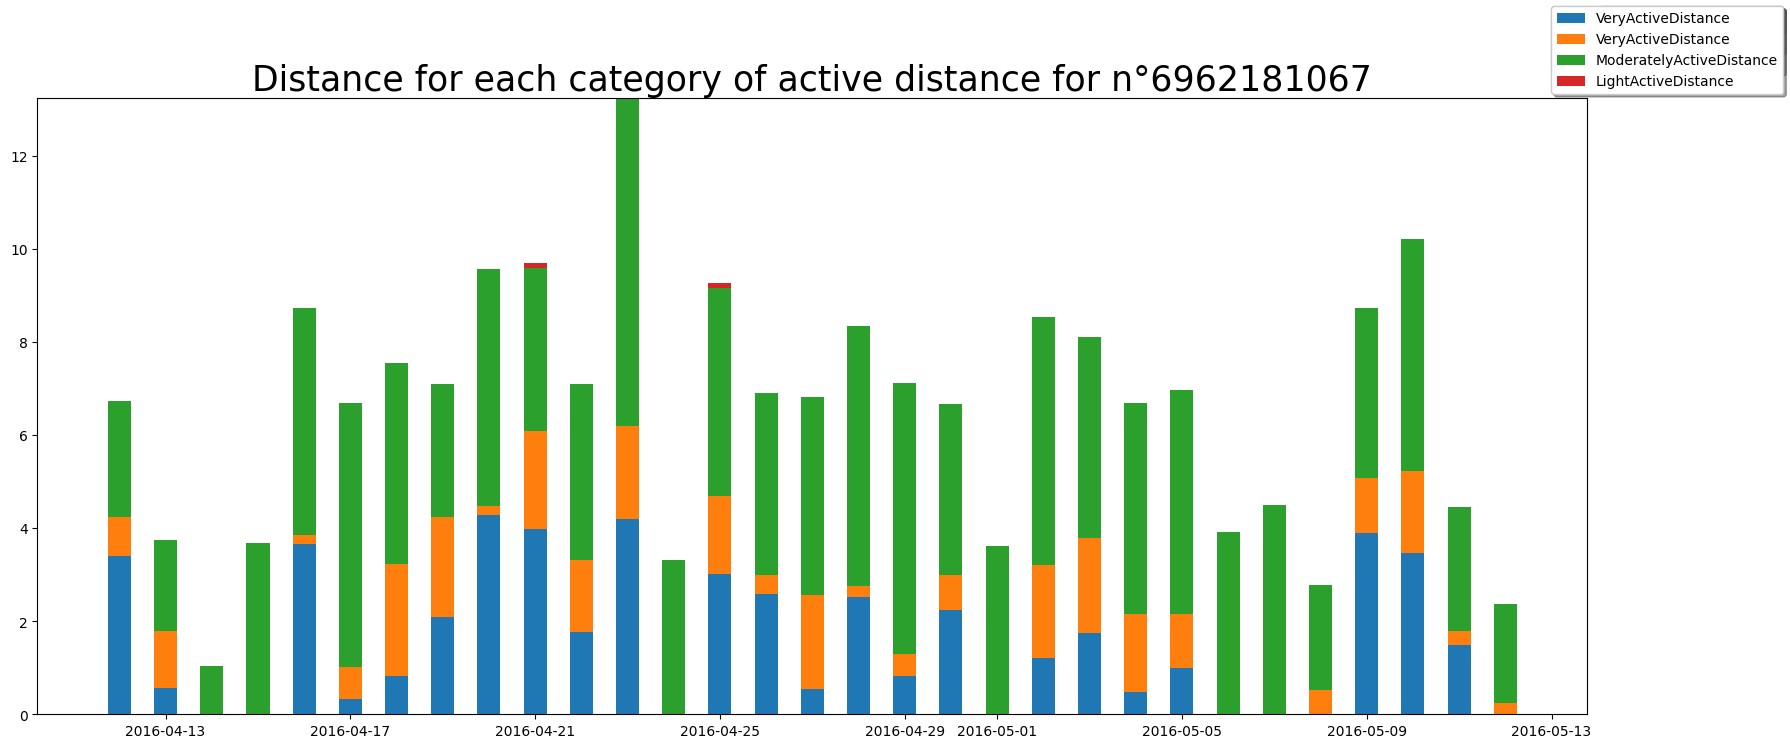

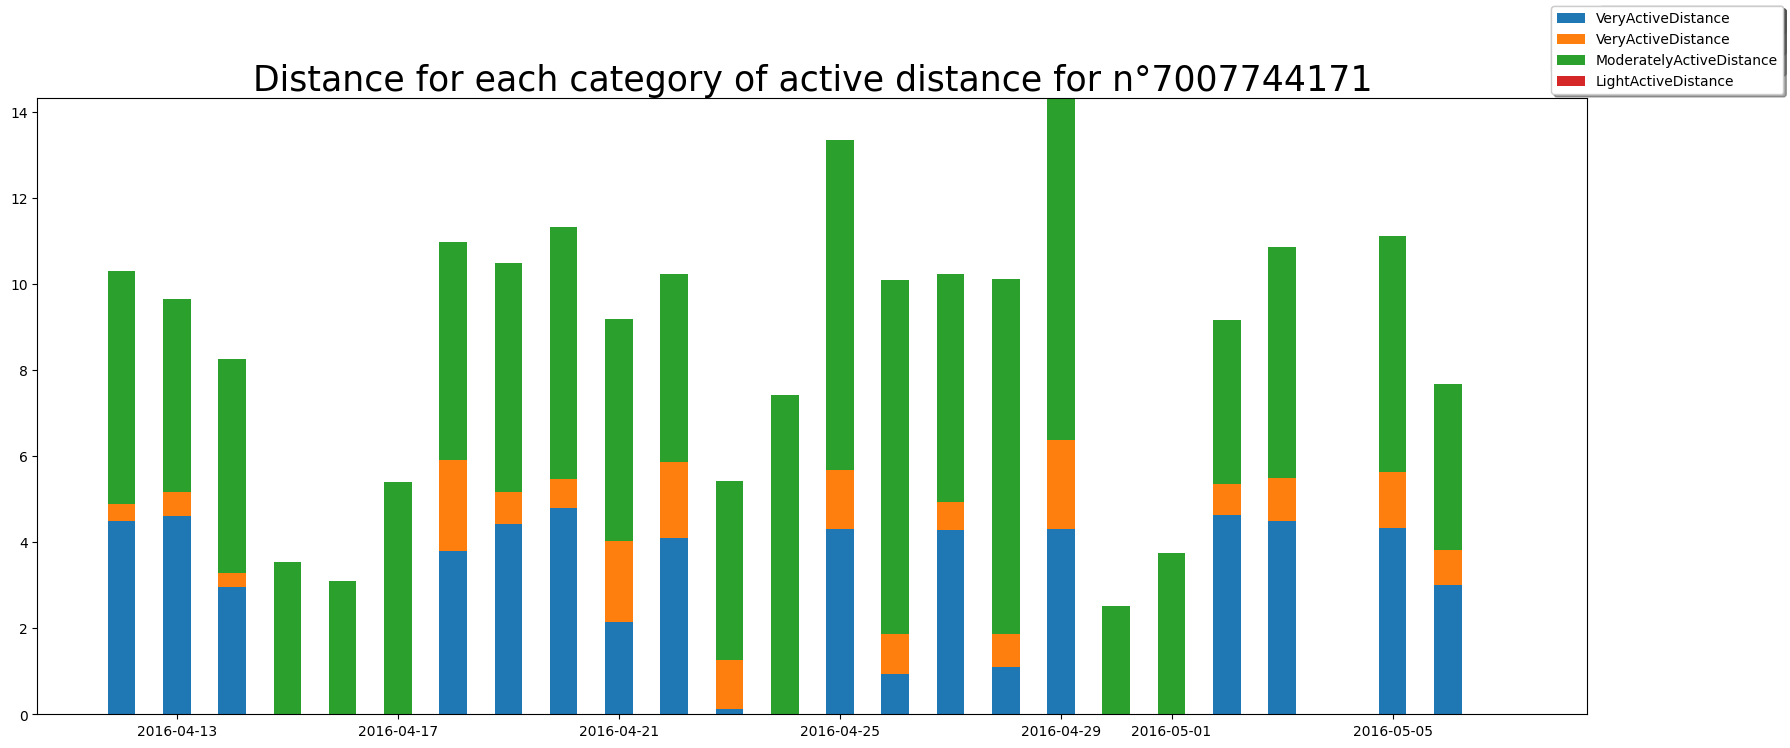

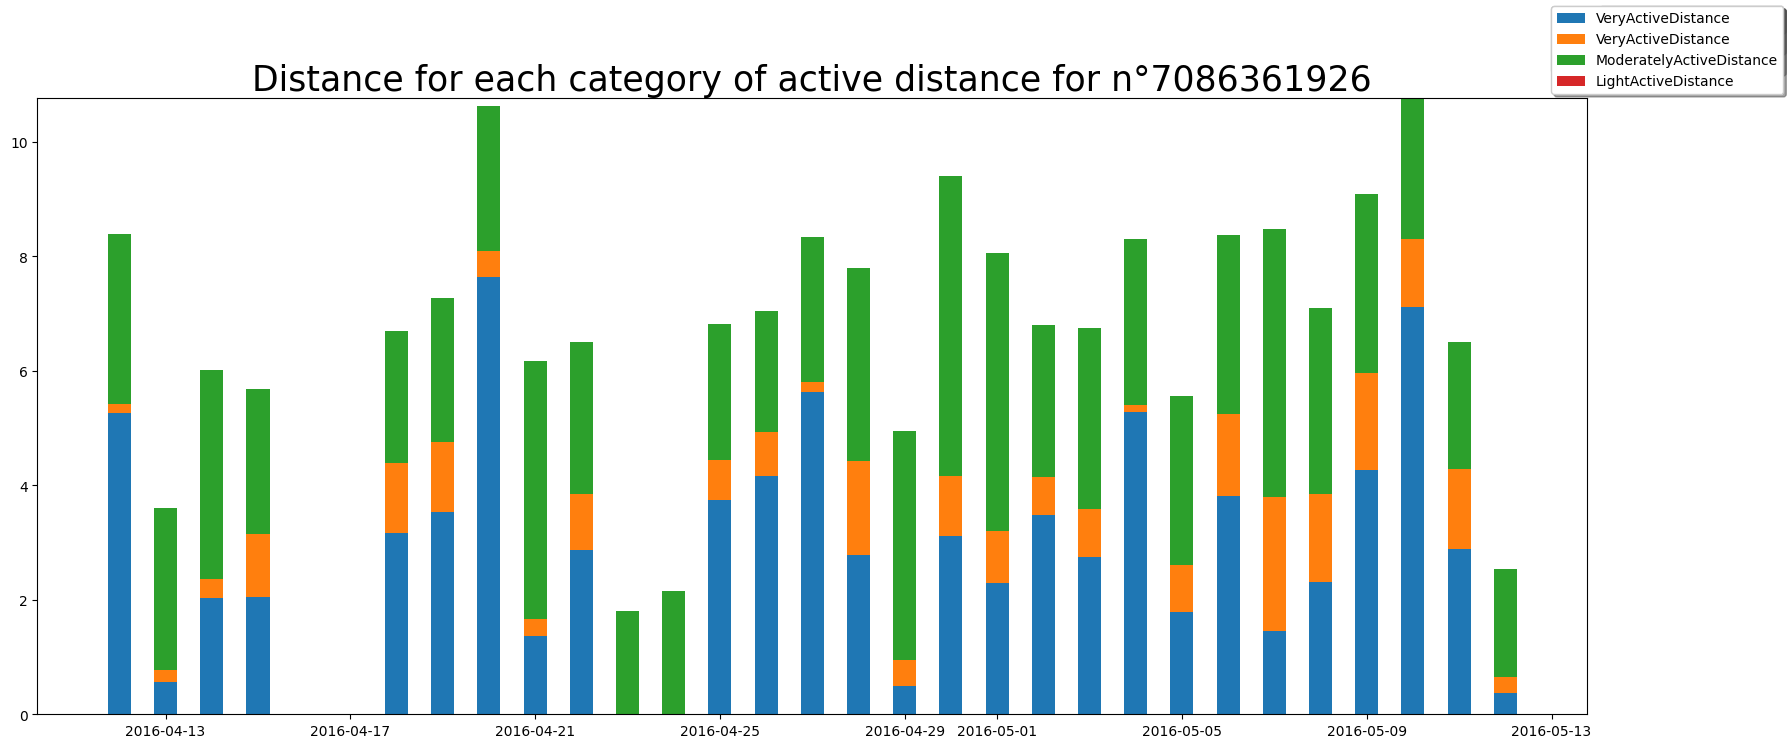

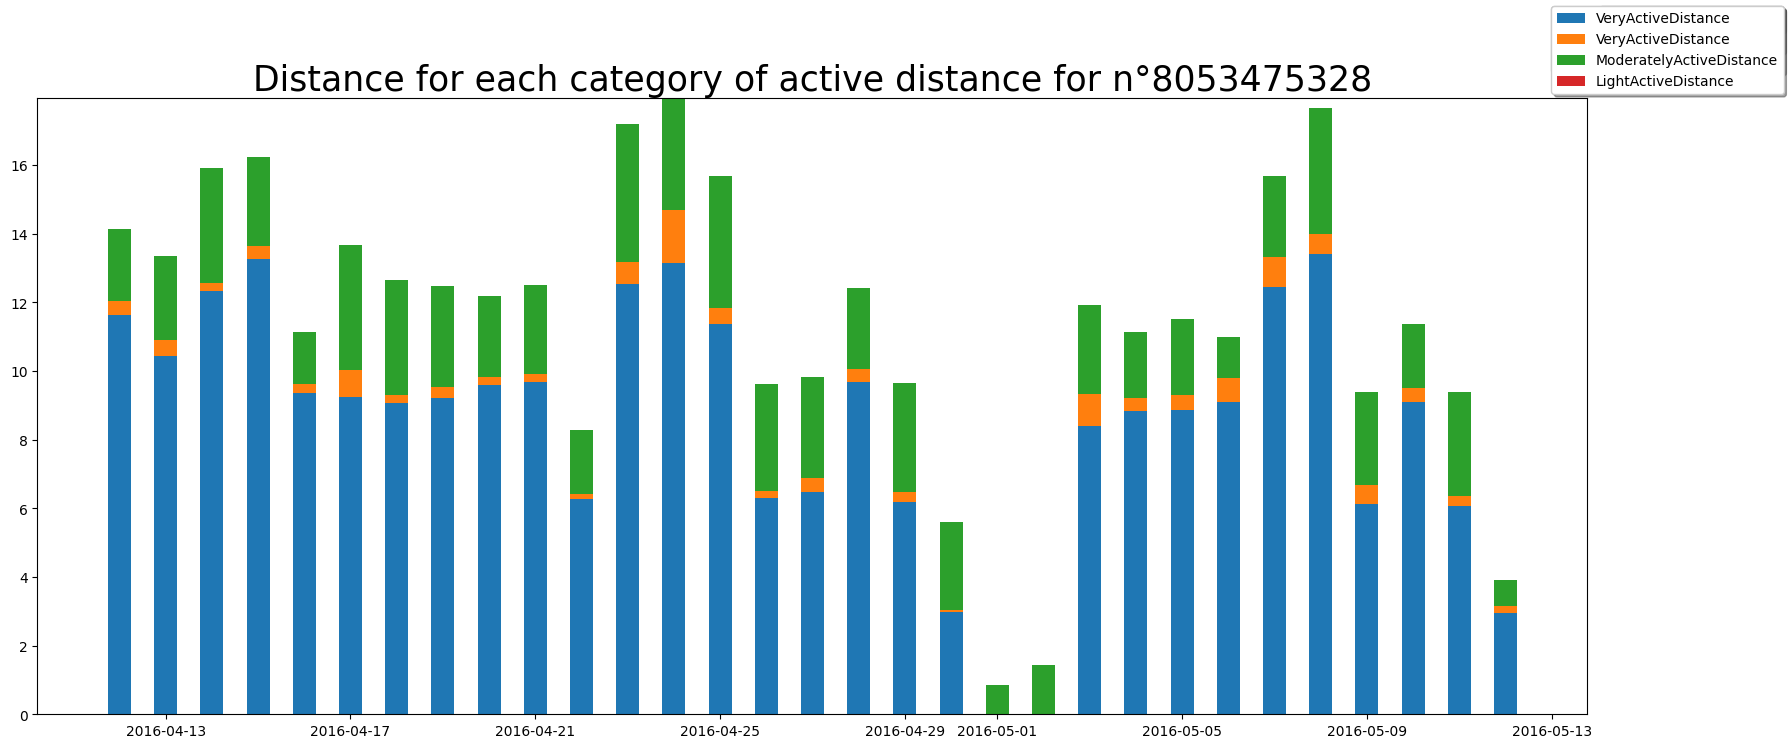

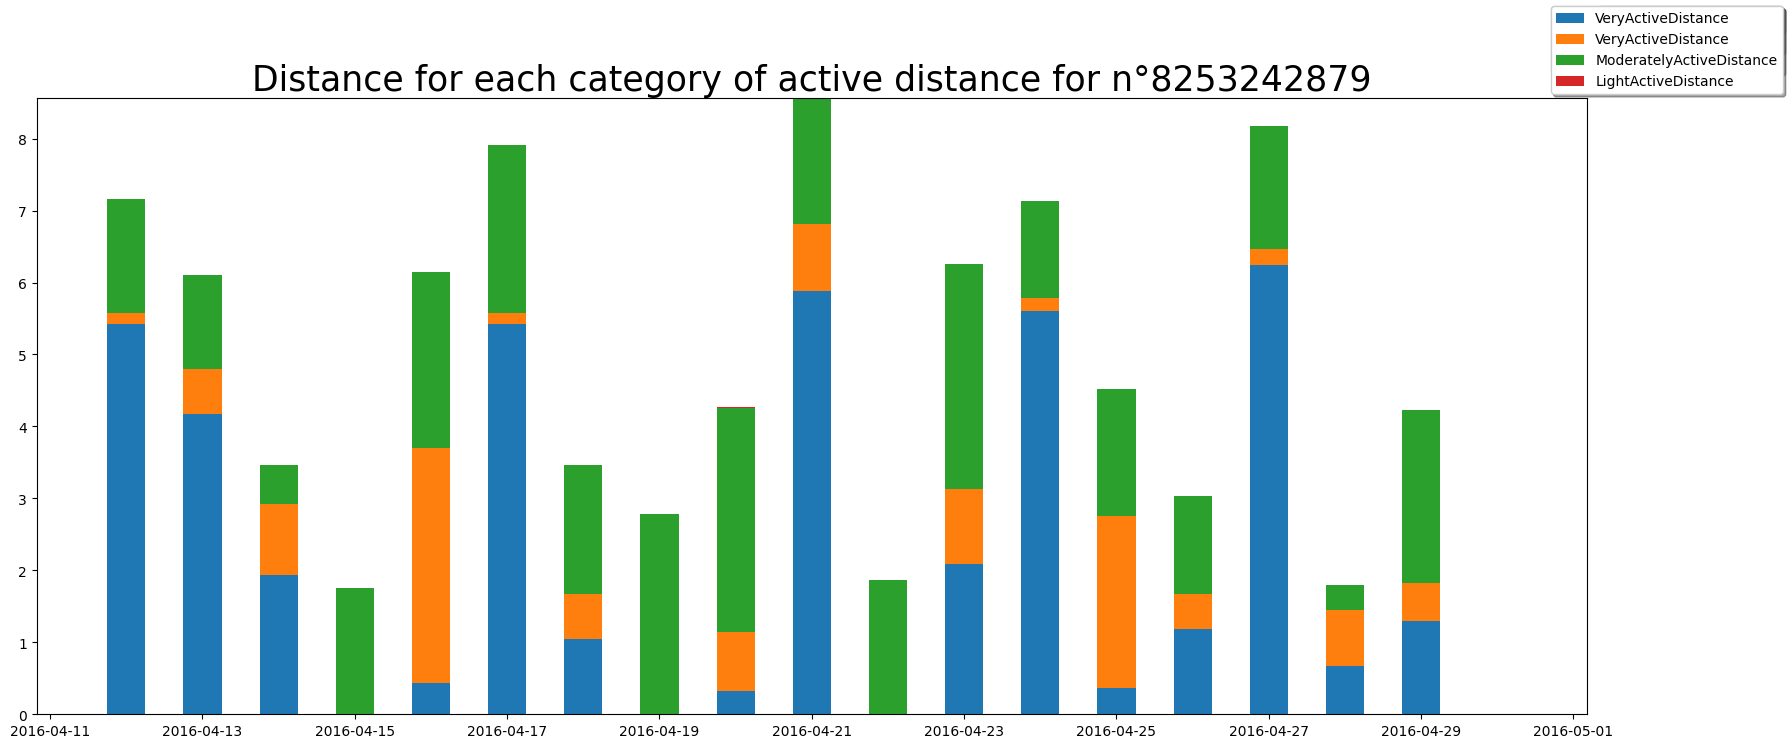

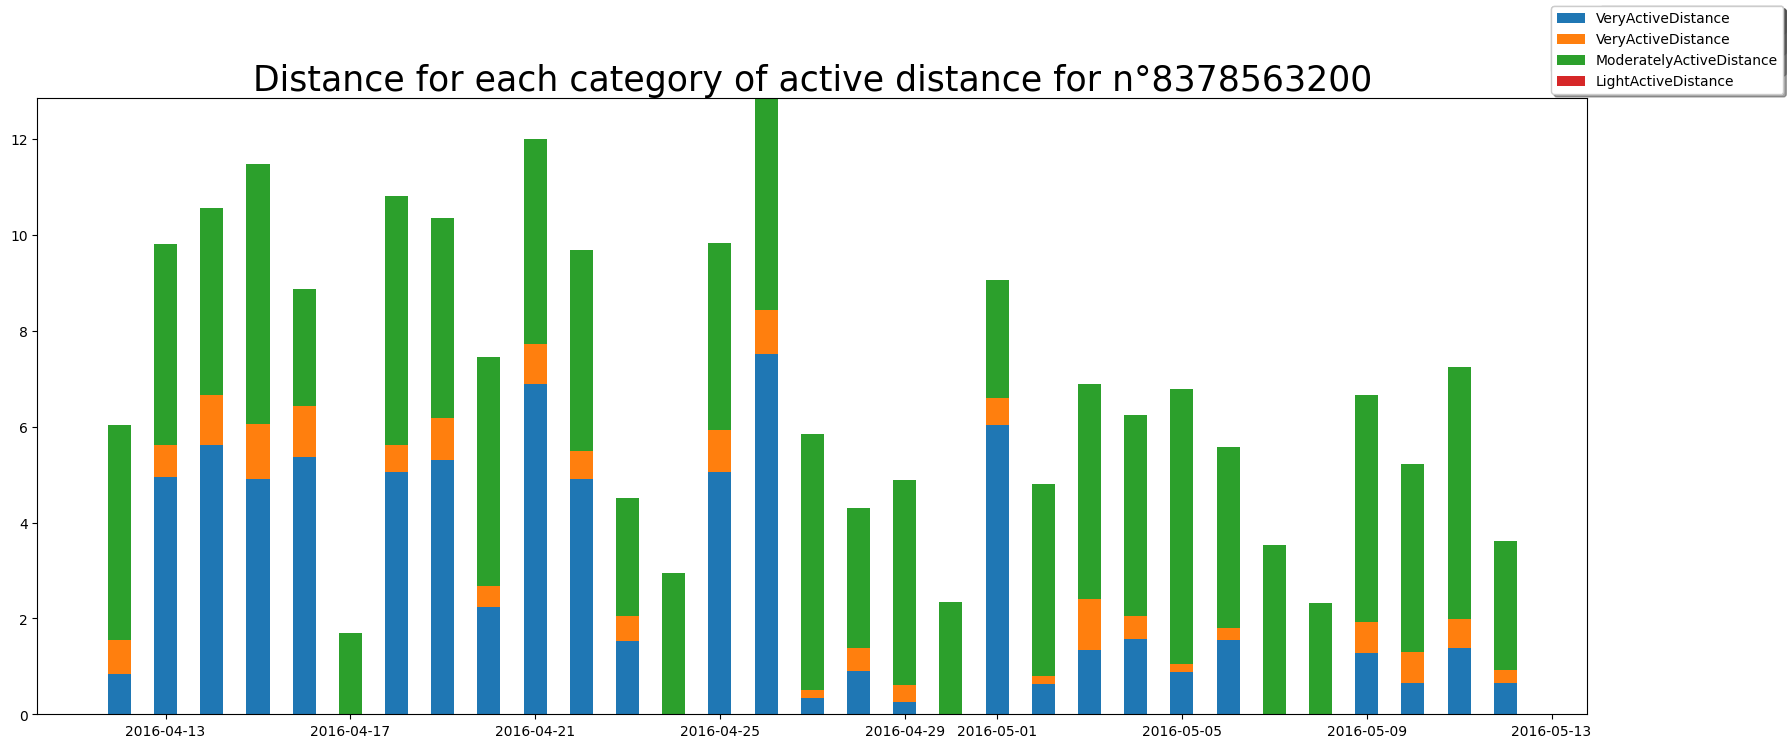

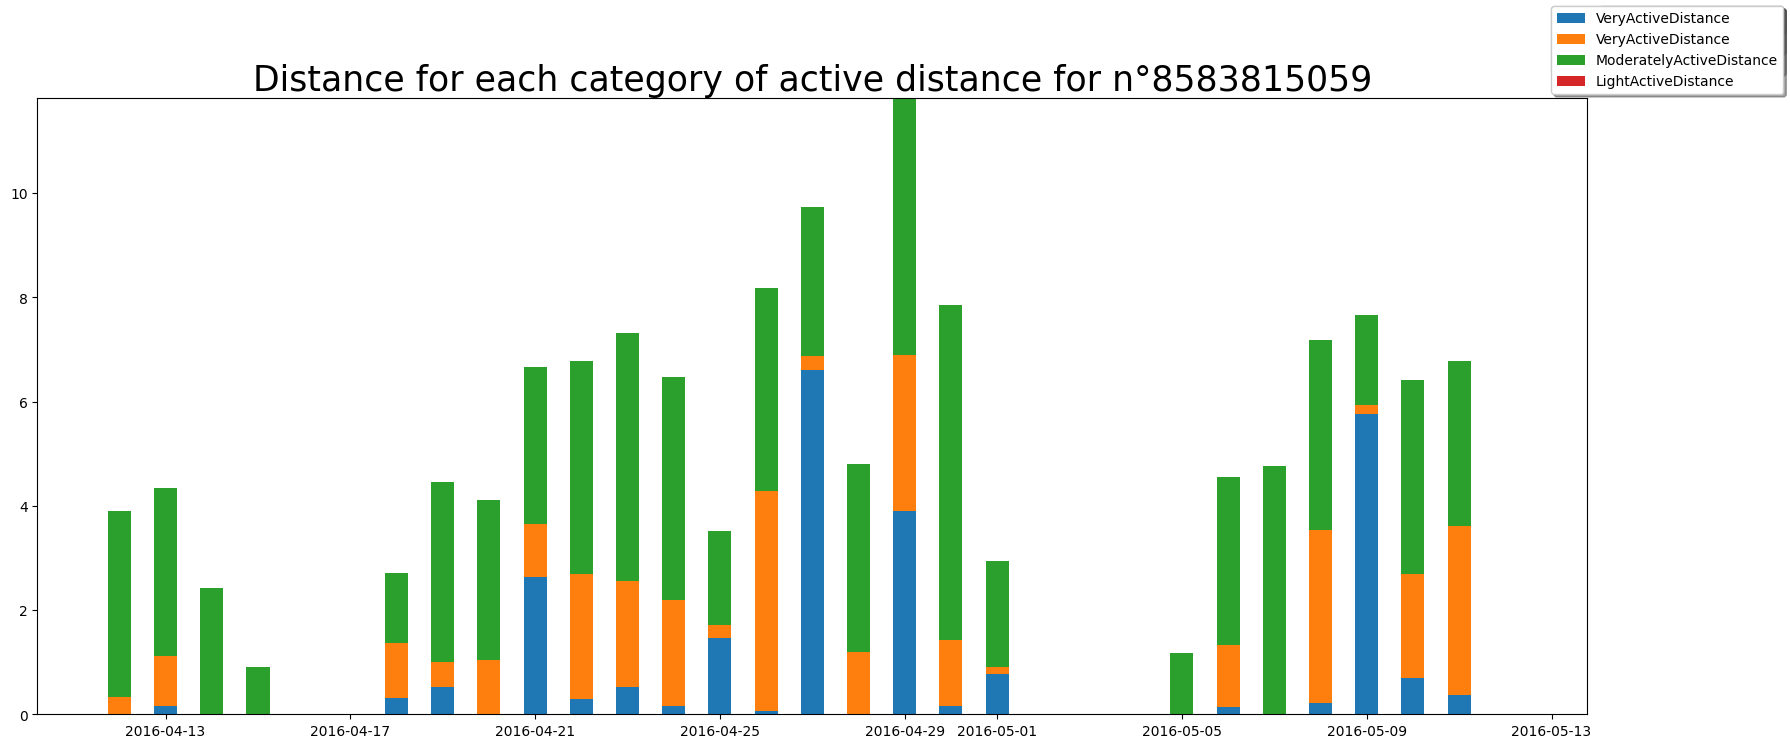

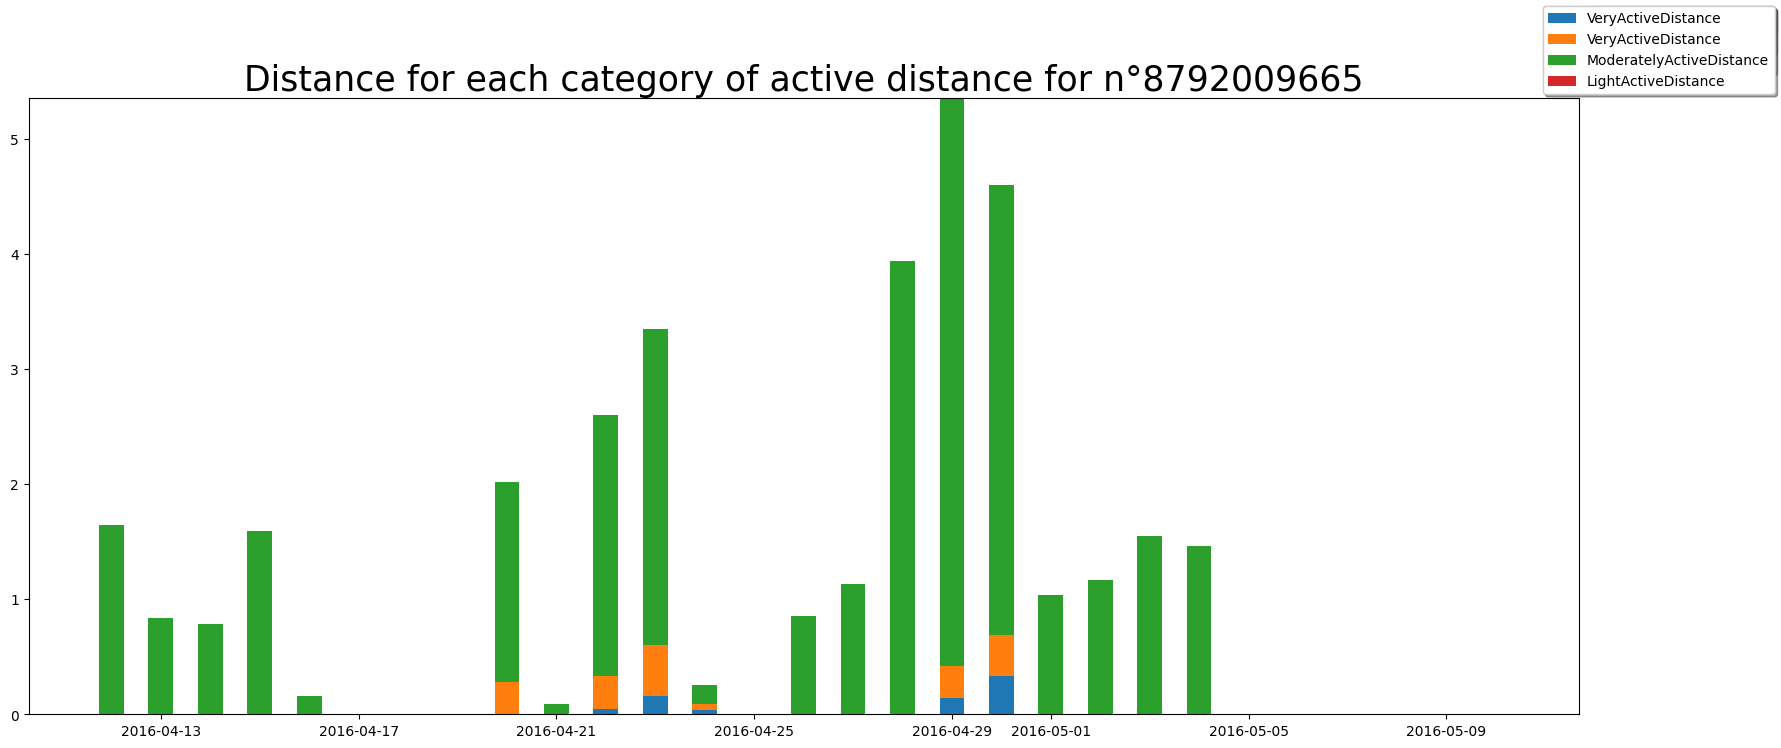

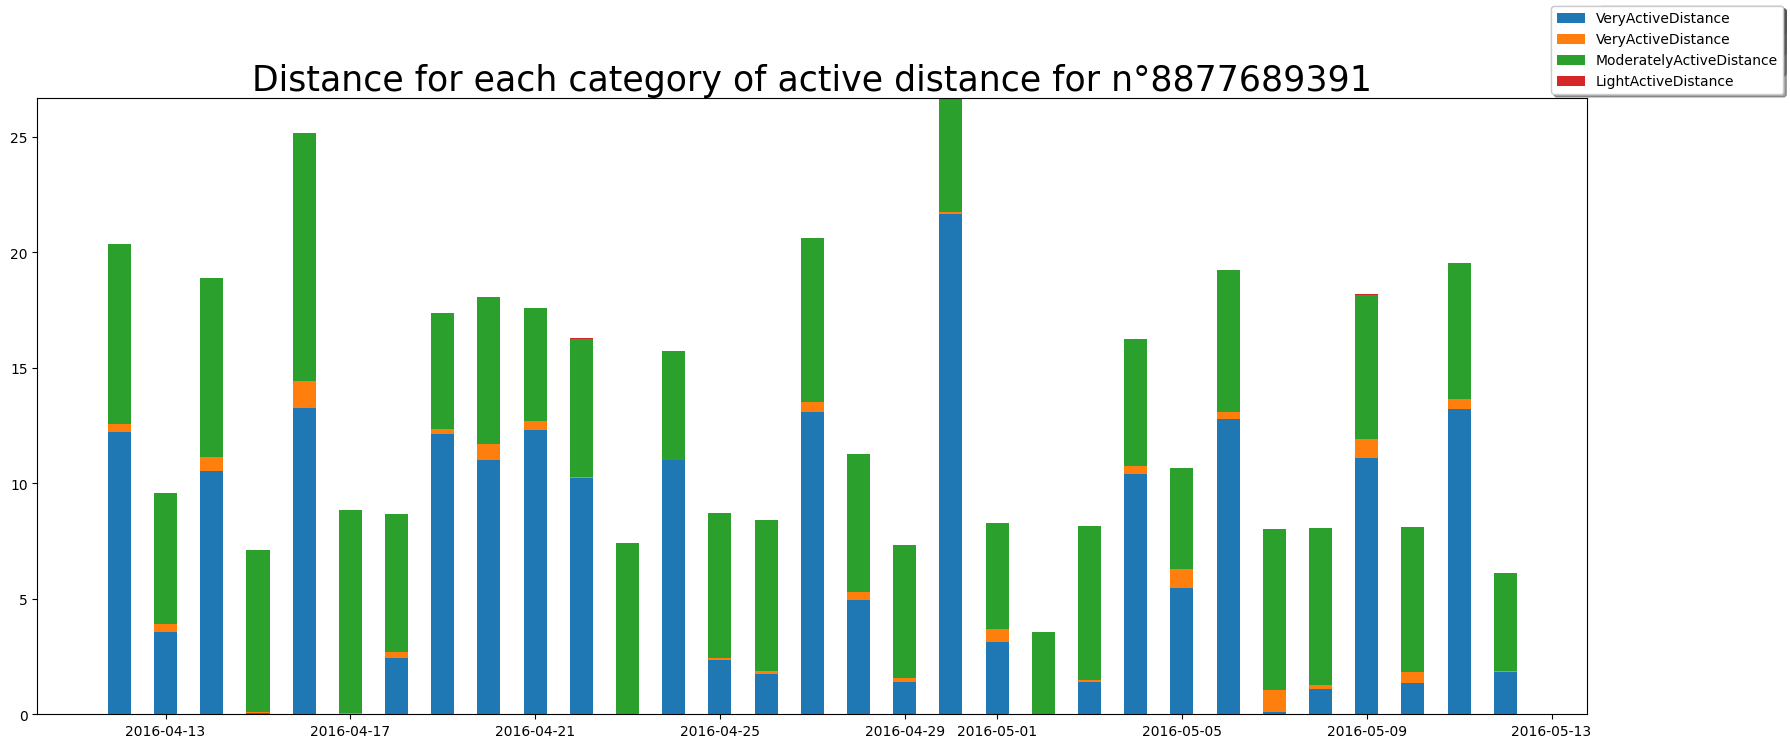

In [12]:
## For each individual :
ind = list(data["Id"].unique())

## Sorting data according date :

data = data.sort_values(by='ActivityDate', ascending=True) ## chronologic order

legend_labels = list()
l = list()

## How to do stacked barplot in matplotlib https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

## For each ind, we will plot differents kind of distance for each day :
## ind stands for individual
for i in ind :
    df = data[ data["Id"] == i ] ## get only data about current ind

    ## create his own plotting space :
    fig, ax = plt.subplots(figsize=(20,8))

    ## b is for bottom of stack
    b = numpy.zeros(shape=len(df["ActivityDate"].unique()))
    ## Every first stack is at 0 level. So we have to have zero-level for each date. 
    # Then, we can update zero level to value of distance.

    ## Create a dictionnary containg distance to plot :
    distances = {
        "VeryActiveDistance" : df["VeryActiveDistance"],
        "ModeratelyActiveDistance" : df["ModeratelyActiveDistance"],
        "LightActiveDistance" : df["LightActiveDistance"],
        "SedentaryActiveDistance" : df["SedentaryActiveDistance"]
    }
    ## We can have confidence in the order, because we sorted data according date previously.

    w = 0.5 ## the width of each column of stacks.

    ## We are ready to plotting data in stacked barplot. 
    # Indeed, a stacked barplot is just a plot with bottom increased by previous values. So we have to ... 

    # ... iterate on dictionnary ...
    for k, v in distances.items() :
        ## ... and create barplot ...
        p = ax.bar(df["ActivityDate"], v, width=w, bottom=b)
        ## ... and update b
        b = b + v

        ax.set_title(f"Distance for each category of active distance for n°{i}", fontsize=25)

        if k not in l :
            l.append(k)
        
        l = list(set(l))    
        legend_labels.extend(l)
        fig.legend(legend_labels,
                ## bbox_to_anchor=(1, 1),
                shadow=True)

plt.show()

In [54]:
data.ActivityDate.unique()

<DatetimeArray>
['2016-04-12 00:00:00', '2016-04-13 00:00:00', '2016-04-14 00:00:00',
 '2016-04-15 00:00:00', '2016-04-16 00:00:00', '2016-04-17 00:00:00',
 '2016-04-18 00:00:00', '2016-04-19 00:00:00', '2016-04-20 00:00:00',
 '2016-04-21 00:00:00', '2016-04-22 00:00:00', '2016-04-23 00:00:00',
 '2016-04-24 00:00:00', '2016-04-25 00:00:00', '2016-04-26 00:00:00',
 '2016-04-27 00:00:00', '2016-04-28 00:00:00', '2016-04-29 00:00:00',
 '2016-04-30 00:00:00', '2016-05-01 00:00:00', '2016-05-02 00:00:00',
 '2016-05-03 00:00:00', '2016-05-04 00:00:00', '2016-05-05 00:00:00',
 '2016-05-06 00:00:00', '2016-05-07 00:00:00', '2016-05-08 00:00:00',
 '2016-05-09 00:00:00', '2016-05-10 00:00:00', '2016-05-11 00:00:00',
 '2016-05-12 00:00:00']
Length: 31, dtype: datetime64[ns]

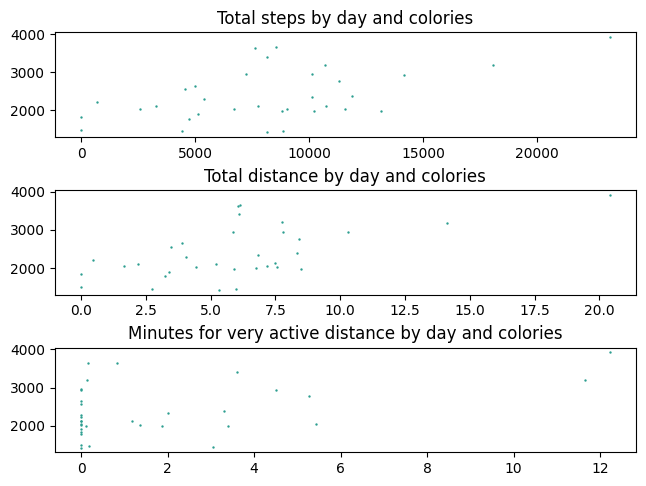

In [56]:
## Plotting totalSteps and spend of calories :
data = data[ data["ActivityDate"] == "2016-04-12 00:00:00" ]

fig, axs = plt.subplots(3)

axs[0].scatter(x=data["TotalSteps"], y=data["Calories"], 
            c="#2a9d8f", s=0.5)
axs[0].set_title("Total steps by day and colories")


axs[1].scatter(x=data["TotalDistance"], y=data["Calories"], 
            c="#2a9d8f", s=0.5)
axs[1].set_title("Total distance by day and colories")


axs[2].scatter(x=data["VeryActiveDistance"], y=data["Calories"], 
            c="#2a9d8f", s=0.5)
axs[2].set_title("Minutes for very active distance by day and colories")

fig.tight_layout(pad=0.5) ## espacer les ax
plt.show()

## Trying to perform correlation analysis :

We aim explain loss of calories. Other variables are continuous quantitative type. TotalDistance an calories seem to have linear relation ship. We can perform Pearson's R coefficient.

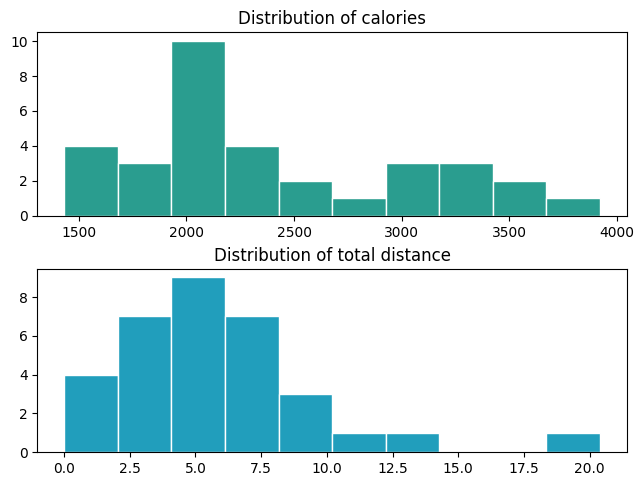

In [57]:
## Check normality :

fig, axs = plt.subplots(2)

axs[0].hist(x=data["Calories"],
            color="#2a9d8f", edgecolor="white")
axs[0].set_title("Distribution of calories")

axs[1].hist(x=data["TotalDistance"],
            color="#219ebc", edgecolor="white")
axs[1].set_title("Distribution of total distance")

fig.tight_layout(pad=0.5) ## spacing ax
plt.show()

In [59]:
from scipy.stats import pearsonr

On pose nos hypothèses de départ :

- H0 : indépendance entre les variables 
- H1 : variables non indépendantes 

In [60]:
## Compute Pearson'R :
res = pearsonr(data["Calories"], data["TotalDistance"])
print(res)

PearsonRResult(statistic=0.5906164145839738, pvalue=0.00029634969473572967)
